# Problem Statement

"**Predicting Rainfall Tomorrow**": Utilizing historical weather data, including minimum and maximum temperatures, rainfall, evaporation, sunshine duration, wind speed and direction, humidity, air pressure, cloud cover, and other relevant factors, develop a predictive model to forecast whether it will rain tomorrow. This project aims to enhance weather forecasting accuracy by leveraging machine learning techniques to analyze past weather patterns and atmospheric conditions, providing valuable insights for individuals, businesses, and organizations reliant on weather predictions."

# Description about the data

1.**Date**: The date of the recorded weather data.

2.**Location**: The geographic location where the weather data was collected.

3.**MinTemp**: The minimum temperature recorded during the day.

4.**MaxTemp**: The maximum temperature recorded during the day.

5.**Rainfall**: The amount of rainfall.

6.**Evaporation**: The amount of water evaporated from the surface.

7.**Sunshine**: The duration of sunshine.

8.**WindGustDir**: The direction from which the strongest gusts of wind occurred.

9.**WindGustSpeed**: The speed of the strongest gusts of wind.

10.**WindDir9am**: The direction of the wind at 9:00 AM.

11.**WindDir3pm**: The direction of the wind at 3:00 PM.

12.**WindSpeed9am**: The wind speed recorded at 9:00 AM.

13.**WindSpeed3pm**: The wind speed recorded at 3:00 PM.

14.**Humidity9am**: The relative humidity recorded at 9:00 AM.

15.**Humidity3pm**: The relative humidity recorded at 3:00 PM.

16.**Pressure9am**: The atmospheric pressure recorded at 9:00 AM.

17.**Pressure3pm**: The atmospheric pressure recorded at 3:00 PM..

18.**Cloud9am**: The fraction of sky covered by clouds at 9:00 AM.

19.**Cloud3pm**: The fraction of sky covered by clouds at 3:00 PM.

20.**Temp9am**: The temperature recorded at 9:00 AM.

21.**Temp3pm**: The temperature recorded at 3:00 PM.

22.**RainToday**: Indicates whether there was any recorded rainfall that day (Yes/No).

23.**RainTomorrow**: The target variable indicating whether it will rain tomorrow (Yes/No).

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My Drive//weather

/gdrive/My Drive/weather


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
warnings.filterwarnings('ignore')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [ ]:
# Loading the dataset into a DataFrame 'df' using pandas
df = pd.read_csv("weatherAUS.csv")

In [ ]:
# Displaying the first five rows of the DataFrame 'df'
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Displaying the last five rows of the DataFrame 'df'
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
# Displaying information about the DataFrame 'df', including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Calculating the number of missing values in each column of the DataFrame 'df'
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Observations**:

1.date and location have no missing values.

2.MinTemp has 1485 missing values.

3.MaxTemp has 1261 missingt values.

4.Rainfall has 3261 missing values.

5.Evaporation has 62790 missing values.

6.Sunshine has 69835 missing values.

7.WindGustDir has 10326 missing values.

8.WindGustSpeed has 10263 missing values.

9.WindDir9am has 10566 missing values.

10.WindDir3pm has 4228 missing values.

11.WindSpeed9am has 1767 misssing values.

12.WindSpeed3pm has 3062 missing values.

13.Humidity9am has 2654 missing values.

14.Humidity3pm has 4507 missing values.

15.Pressure9am has 15065 missing values.

16.Pressure3pm has 15028 missing values.

17.Cloud9am has 55888 missing values.

18.Cloud3pm has 59358 missing values.

19.Temp9am has 1767 missing values.

20.Temp3pm has 3609 misssing values.

21.RainToday has 3261 missing values.

22.RainTomorrow has 3267 missing values.

In [ ]:
# Generating descriptive statistics summary for numerical columns in the DataFrame 'df'
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# Generating descriptive statistics summary for categorical (object-type) columns in the DataFrame 'df'
df.describe(include="object")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


**Observations**:

**Date**:

1.There are 3436 unique dates in the Date column

2.The most frequent Date is 2013-11-12 with 49 frequencies.

**Location**:

1.There are 49 unique values in the location column.

2.The most frequent location is Canberra with 3426 frequencies.

**WindGustDir**:

1.There are 16 unique values in the WindGustDir column.

2.The most Frequent direction is West(W) with 9915 frequencies.

**WindDir9am**:

1.There are 16 unique values in the WindDir9am column.

2.The most frequent direction is North(N) with 11758 frequenies.

**WindDir3pm**:

1.There are 16 unique values in the WindDir3pm column.

2.The most frequent direction is Southeast(SE) with 10838 frequencies.

**RainToday**:

1.There are 2 unique values in the RainToday column

2.The most frequent value is No with 110319 frequencies.

**RainTomorrow**:

1.There are 2 unique values in the RainTomorrow column.

2.The most frequent value is No with 110316 frequencies.

In [ ]:
# Get the number of unique values in each column of the DataFrame 'df'
df_nunique = df.nunique()

# Display the summary
print(df_nunique)

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64


In [ ]:
#Checking the no of rows and columns of the data
df.shape

(145460, 23)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Lets Explore the Target Variable

Dropping the following columns:

1.**Date**: Unless there's a seasonal or time-based pattern you want to capture, dates are typically irrelevant so remove it.

2.**Location**: It  doesn't significantly impact the traget variable Rain Tomorrow,so drop this column.

3.**Evaporation**: While evaporation could be related to humidity or rainfall, it might not provide significant predictive power on its own.

4.**Sunshine**: Similar to evaporation, unless sunshine hours have a direct impact on target variable, remove it.

5.**WindGustDir and WindDir9am/WindDir3pm**: Directional wind data might not be directly related to the likelihood of rain tomorrow.

In [ ]:
columns_to_drop = ['Date', 'Location', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
# Dropping the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Verifying if the columns have been dropped
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

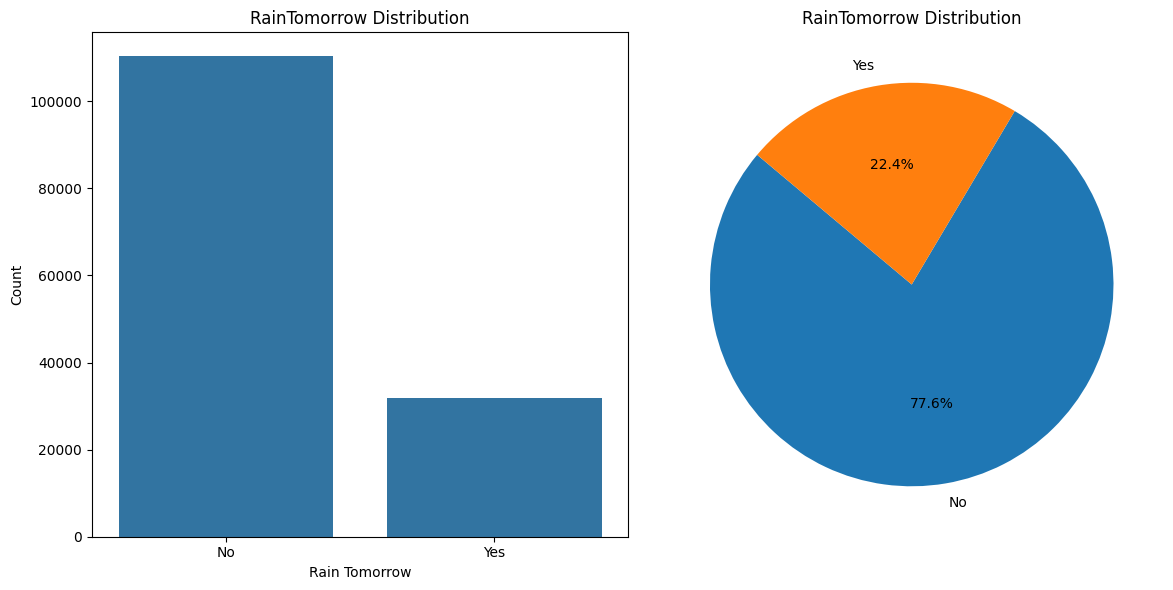

In [ ]:
# Plotting settings
plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='RainTomorrow')
plt.title('RainTomorrow Distribution')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
sizes = df['RainTomorrow'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140)
plt.title('RainTomorrow Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Observations**:

1.Approximately 77.6% are labelled as No indicating there will be  no rain tomorrow.

2.Approximately 22.4% are labelled as Yes indicating there will be rain tomorrow.
(As you can clearly see the data is imbalnced).

# Data Cleaning

In [ ]:
df['MinTemp'].fillna(df['MinTemp'].median(), inplace=True)

In [ ]:
#  Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['MinTemp_standardized'] = scaler.fit_transform(df[['MinTemp']])

In [ ]:
# : Scale 'MinTemp' to range [0, 1]
min_temp_range = df['MinTemp'].max() - df['MinTemp'].min()
df['MinTemp_scaled'] = (df['MinTemp'] - df['MinTemp'].min()) / min_temp_range

In [ ]:
df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)

In [ ]:
#  Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['MaxTemp_standardized'] = scaler.fit_transform(df[['MaxTemp']])

In [ ]:
# List of columns to drop
columns_to_drop = ['MinTemp_standardized', 'MinTemp_scaled', 'MaxTemp_standardized']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Filling missing values of Rainfall with median
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)

In [ ]:
# Filling missing values of WindGustSpeed with median
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)

In [ ]:
# Filling missing values of WindSpeed9am with median
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)

In [ ]:
# Filling missing values of WindSpeed3pm with median
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)

In [ ]:
# Filling missing values of Humidity9am with median
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)

In [ ]:
# Filling missing values of Humidity3pm with median
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)

In [ ]:
# Filling missing values of Pressure9am with median
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)

In [ ]:
# Filling missing values of Pressure3pm with median
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)

In [ ]:
# Filling missing values of Cloud9am  with median
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)

In [ ]:
# Filling missing values of Cloud3pm  with median
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)

In [ ]:
# Filling missing values of Temp9am  with median
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)

In [ ]:
# Filling missing values of Temp3pm  with median
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)

In [ ]:
# Step 1: Replace non-standard representations with NaN
df['RainToday'].replace(['', 'nan'], np.nan, inplace=True)

# Step 2: Impute missing values with the mode
mode_value = df['RainToday'].mode()[0]
df['RainToday'].fillna(mode_value, inplace=True)

# Step 3: Convert categorical values to numerical values
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})


In [ ]:
# Step 1: Replace non-standard representations with NaN
df['RainTomorrow'].replace(['', 'nan'], np.nan, inplace=True)

# Step 2: Impute missing values with the mode
mode_value = df['RainTomorrow'].mode()[0]
df['RainTomorrow'].fillna(mode_value, inplace=True)

# Step 3: Convert categorical values to numerical values
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# checking for if there are any other null values left
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# EDA

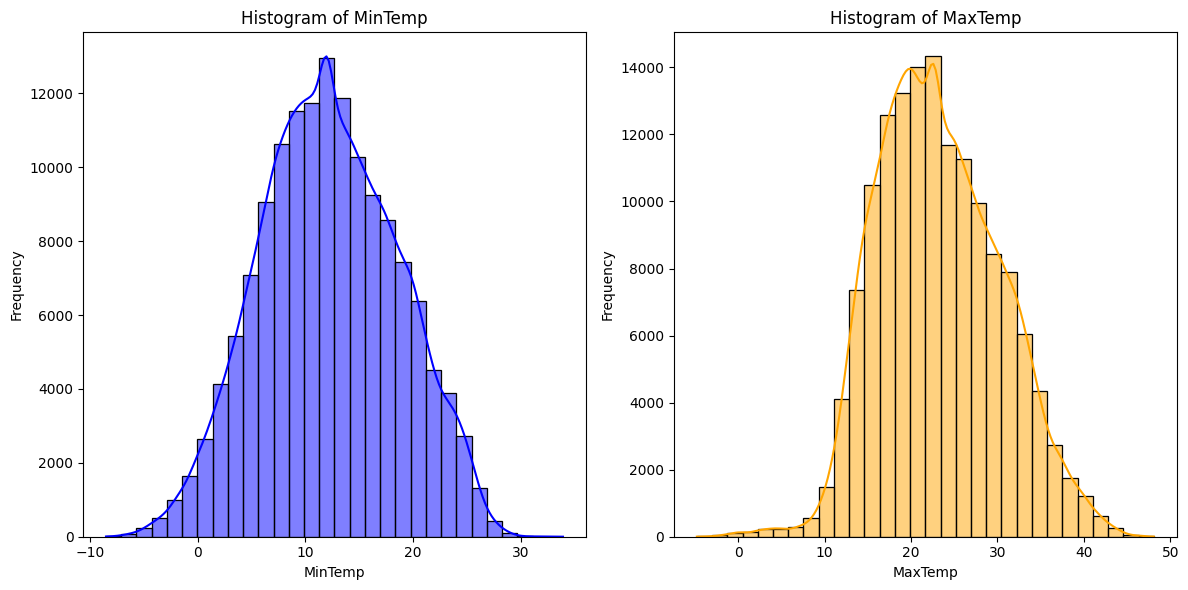

In [ ]:
# Plot histogram for MinTemp
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MinTemp', bins=30, color='blue', alpha=0.5, kde=True)
plt.xlabel('MinTemp')
plt.ylabel('Frequency')
plt.title('Histogram of MinTemp')


# Plot histogram for MaxTemp
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='MaxTemp', bins=30, color='orange', alpha=0.5, kde=True)
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.title('Histogram of MaxTemp')

# Adjust layout
plt.tight_layout()

plt.show()

**Observations**:

**MinTemp**:

1.The most frequent minimum temperature is between 10 and 20.

2.The minimum temperature appears to be normally distributed, with a slight skew to the right.

**MaxTemp**:

1.The most frequent maximum temperature is between 20 and 30.

2.The maximum temperature appears to be normally distributed.

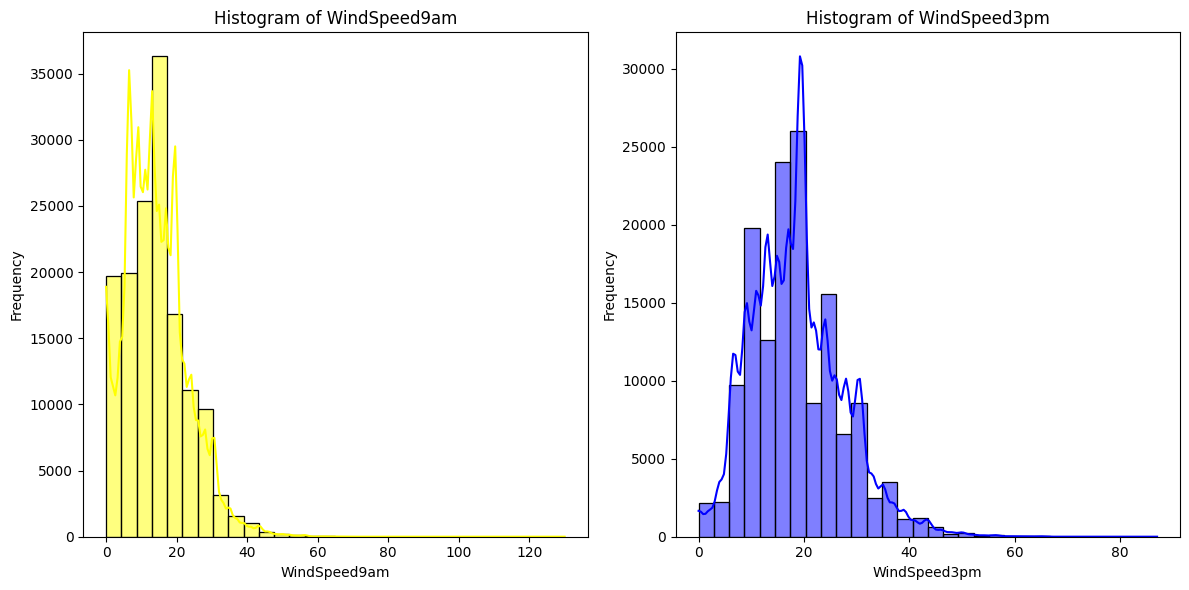

In [ ]:
# Plot histograms side by side
plt.figure(figsize=(12, 6))

# Plot histogram for WindSpeed9am
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='WindSpeed9am', bins=30, color='yellow', alpha=0.5, kde=True)
plt.xlabel('WindSpeed9am')
plt.ylabel('Frequency')
plt.title('Histogram of WindSpeed9am')

# Plot histogram for WindSpeed3pm
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='WindSpeed3pm', bins=30, color='blue', alpha=0.5, kde=True)
plt.xlabel('WindSpeed3pm')
plt.ylabel('Frequency')
plt.title('Histogram of WindSpeed3pm')

# Adjust layout
plt.tight_layout()

plt.show()

**Observations**:

1.The most frequent wind speed at 9 AM and 3 PM is between 20 and 40.

2.The wind speed appears to be normally distributed at both 9 AM and 3 PM.

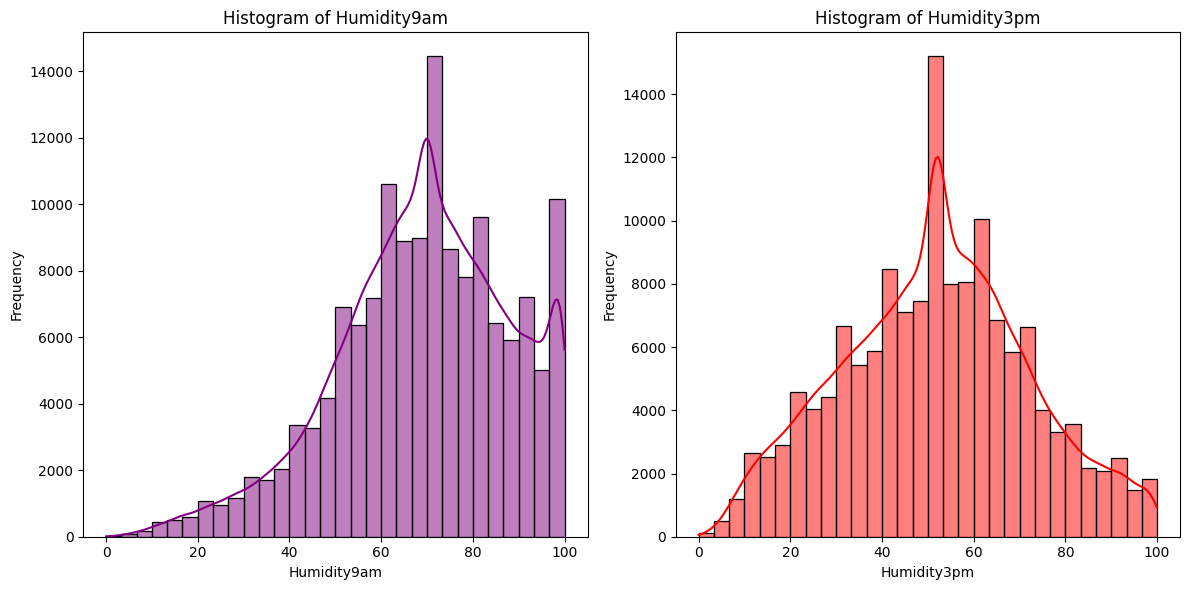

In [ ]:
# Plot histograms side by side
plt.figure(figsize=(12, 6))

# Plot histogram for Humidity9am
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Humidity9am', bins=30, color='purple', alpha=0.5, kde=True)
plt.xlabel('Humidity9am')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity9am')

# Plot histogram for Humidity3pm
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Humidity3pm', bins=30, color='red', alpha=0.5, kde=True)
plt.xlabel('Humidity3pm')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity3pm')

# Adjust layout
plt.tight_layout()

plt.show()

**Observations**:

1.The histogram on the left titled "Histogram of Humidity9am" shows that the most frequent humidity level at 9 AM is between 40 and 60. There are fewer occurrences of humidity levels below 20 and above 80.

2.The histogram on the right titled "Histogram of Humidity3pm" shows that the most frequent humidity level at 3 PM is between 20 and 40. There are fewer occurrences of humidity levels below 0 and above 60.

3.The histograms are normally ditributed.

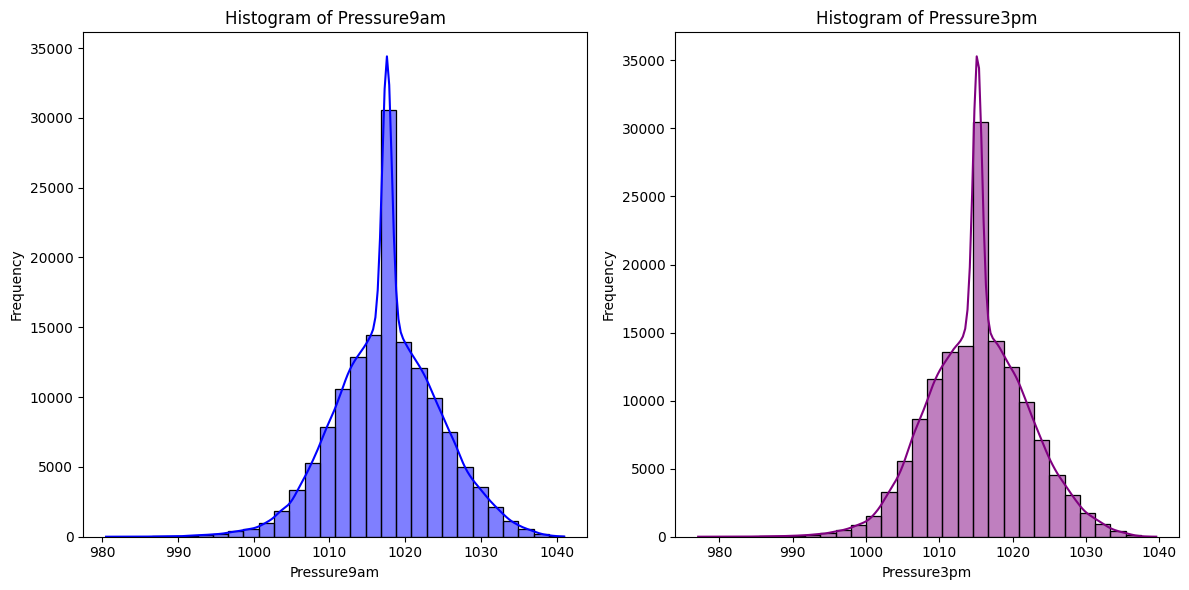

In [ ]:
# Plot histograms side by side
plt.figure(figsize=(12, 6))

# Plot histogram for Pressure9am
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Pressure9am', bins=30, color='blue', alpha=0.5, kde=True)
plt.xlabel('Pressure9am')
plt.ylabel('Frequency')
plt.title('Histogram of Pressure9am')

# Plot histogram for Pressure3pm
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Pressure3pm', bins=30, color='purple', alpha=0.5, kde=True)
plt.xlabel('Pressure3pm')
plt.ylabel('Frequency')
plt.title('Histogram of Pressure3pm')

# Adjust layout
plt.tight_layout()

plt.show()

**Observations**:

1.The most frequent pressure at 9 AM is between 1000  and 1010 . There are fewer occurrences of pressures below 980  and above 1040.

2.The most frequent pressure at 3 PM is also between 1000  and 1010 . There are fewer occurrences of pressures below 980  and above 1040.

3.The pressure distribution appears to be similar at 9 AM and 3 PM, with both having a normal distribution with a slight skew to the right.

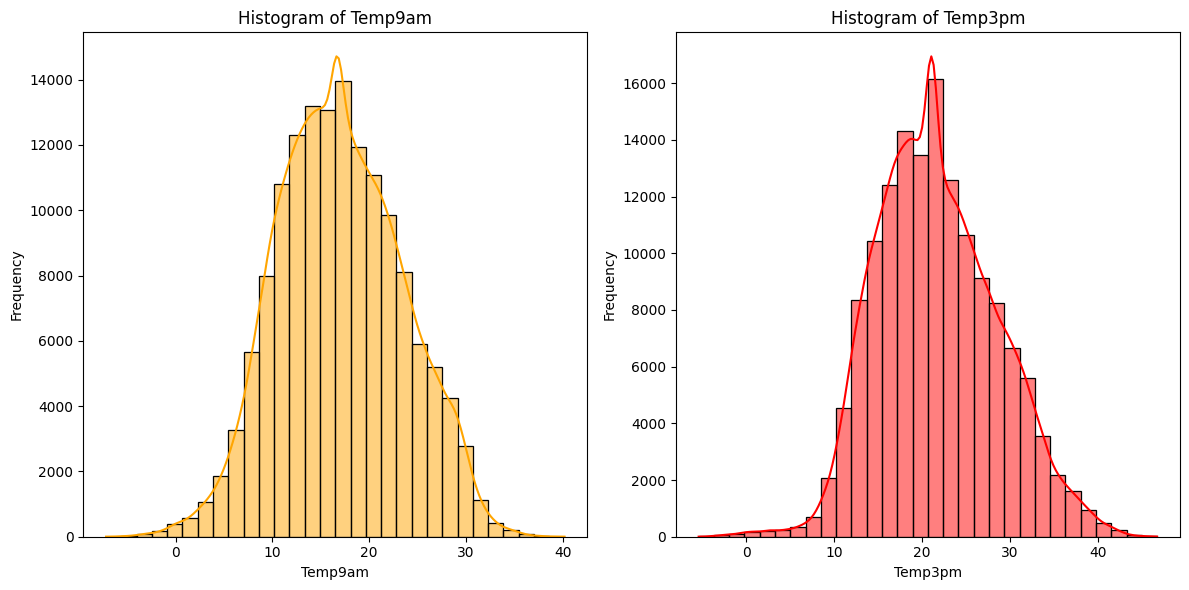

In [ ]:
# Plot histograms side by side
plt.figure(figsize=(12, 6))

# Plot histogram for  Temp9am
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Temp9am', bins=30, color='orange', alpha=0.5, kde=True)
plt.xlabel('Temp9am')
plt.ylabel('Frequency')
plt.title('Histogram of Temp9am')

# Plot histogram for Temp3pm
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Temp3pm', bins=30, color='red', alpha=0.5, kde=True)
plt.xlabel('Temp3pm')
plt.ylabel('Frequency')
plt.title('Histogram of Temp3pm')

# Adjust layout
plt.tight_layout()

plt.show()

**Observations**:

**Temp9am**: The most frequent temperature is between 10 and 20 . There are fewer occurrences of temperatures below 10  and above 30 degrees. The temperature distribution appears to be slightly skewed to the right.

**Temp3pm**: The most frequent temperature is between 20 and 30 . There are fewer occurrences of temperatures below 10  and above 40 . The temperature distribution appears to be slightly skewed to the right.

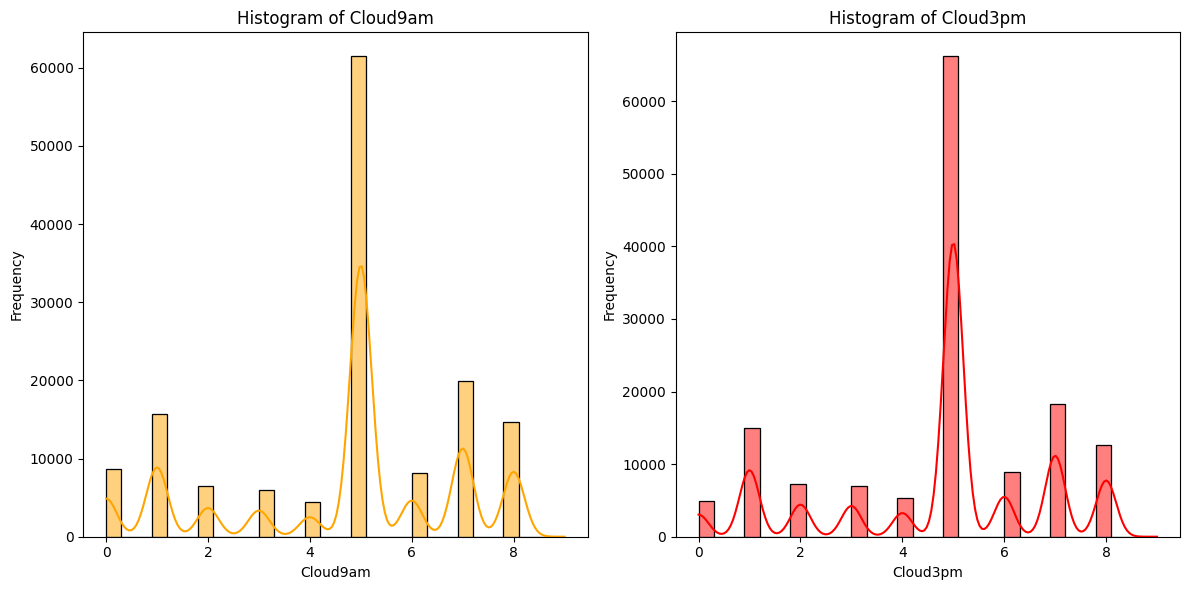

In [ ]:

plt.figure(figsize=(12, 6))

# Plot histogram for Cloud9am
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Cloud9am', bins=30, color='orange', alpha=0.5, kde=True)
plt.xlabel('Cloud9am')
plt.ylabel('Frequency')
plt.title('Histogram of Cloud9am')

# Plot histogram for Cloud3pm
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Cloud3pm', bins=30, color='red', alpha=0.5, kde=True)
plt.xlabel('Cloud3pm')
plt.ylabel('Frequency')
plt.title('Histogram of Cloud3pm')

# Adjust layout
plt.tight_layout()

plt.show()

**Observations**:

**Cloud9am**: The histogram for cloud cover at 9 AM is not normally distributed. The most frequent cloud cover is between 4 and 5 , which means 40% to 50% of the sky is covered by clouds. There are fewer occurrences of skies that are completely clear 0 or completely overcast 8.


**Cloud3pm**: The histogram for cloud cover at 3 PM is not normally distributed. It has a bimodal distribution, with two peaks at around 2 and 6 . This means that the sky is most likely to be either partly cloudy (2-3 ) or mostly cloudy (6-7 ) at 3 PM. There are fewer occurrences of completely clear or completely overcast skies.

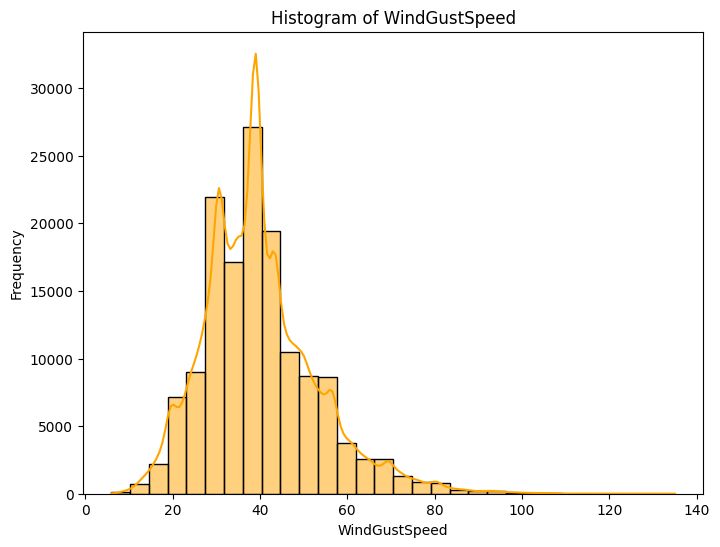

In [ ]:
# Plot histogram for WindGustSpeed
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='WindGustSpeed', bins=30, color='orange', alpha=0.5, kde=True)
plt.xlabel('WindGustSpeed')
plt.ylabel('Frequency')
plt.title('Histogram of WindGustSpeed')
plt.show()

**Observations**:

1.The most frequent wind gust speed  is between 10 and 20.

2.There are fewer occurrences of wind gust speeds below 5  or above 50.
The wind gust speed appears to be right-skewed, meaning that there are more frequent occurrences of lower wind gust speeds than higher wind gust speeds.

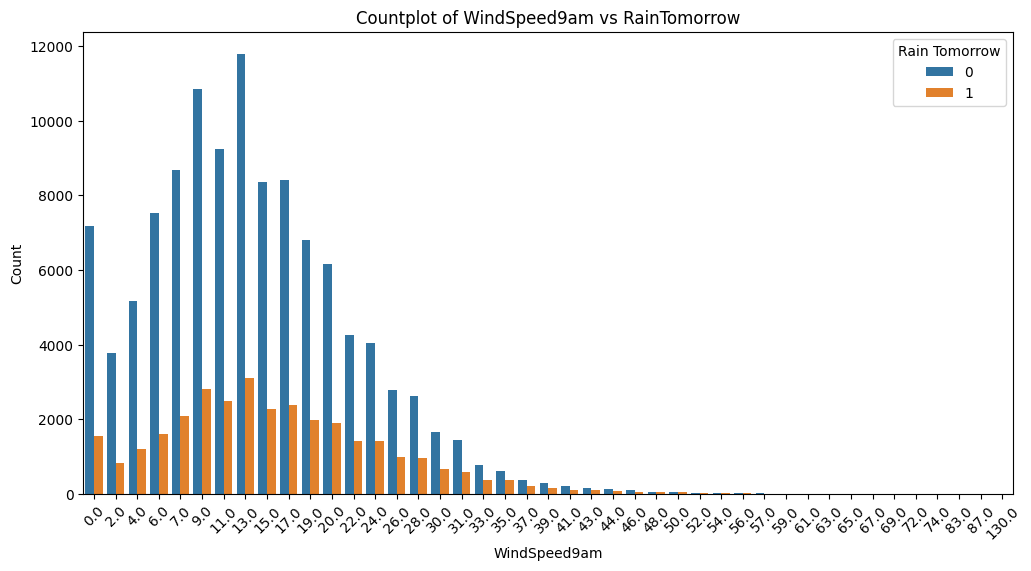

In [ ]:
# Create countplot for WindSpeed9am vs RainTomorrow
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='WindSpeed9am', hue='RainTomorrow')
plt.title('Countplot of WindSpeed9am vs RainTomorrow')
plt.xlabel('WindSpeed9am')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()

**Observations**:

1.The most frequent windspeed is between 5 and 10.

2.There are fewer occurrences of windspeeds below 5 and above 20.

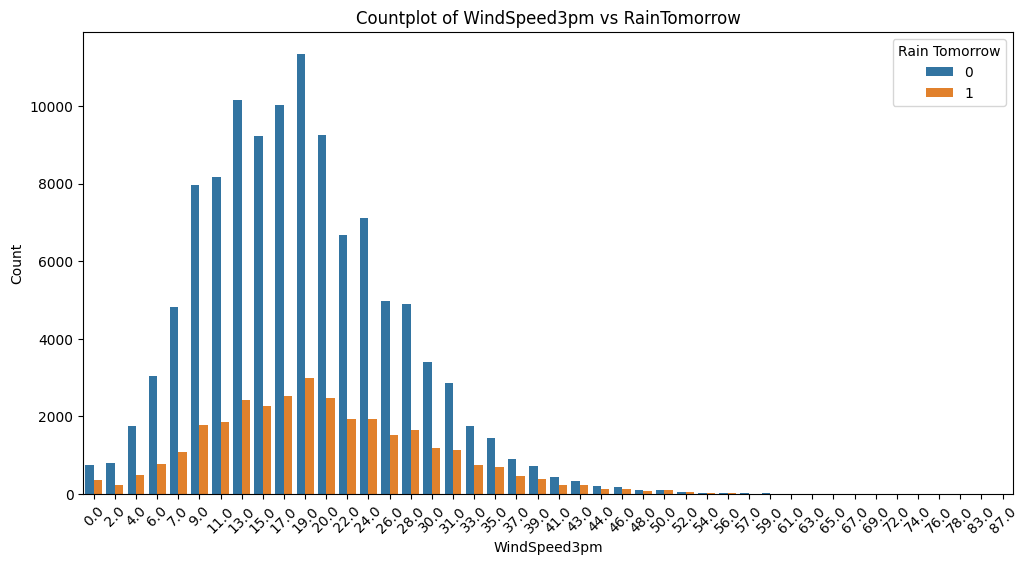

In [ ]:
# Create countplot for WindSpeed3pm vs RainTomorrow
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='WindSpeed3pm', hue='RainTomorrow')
plt.title('Countplot of WindSpeed3pm vs RainTomorrow')
plt.xlabel('WindSpeed3pm')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()

 **Observations**:

1.The most frequent windspeed at 3pm is between 0 and 20. There are 10000 counts for this windspeed.

2.There are fewer occurrences for windspeeds above 11.

3.The windspeed appears to be skewed to the right, meaning there are more frequent occurrences of lower windspeeds than higher windspeeds.

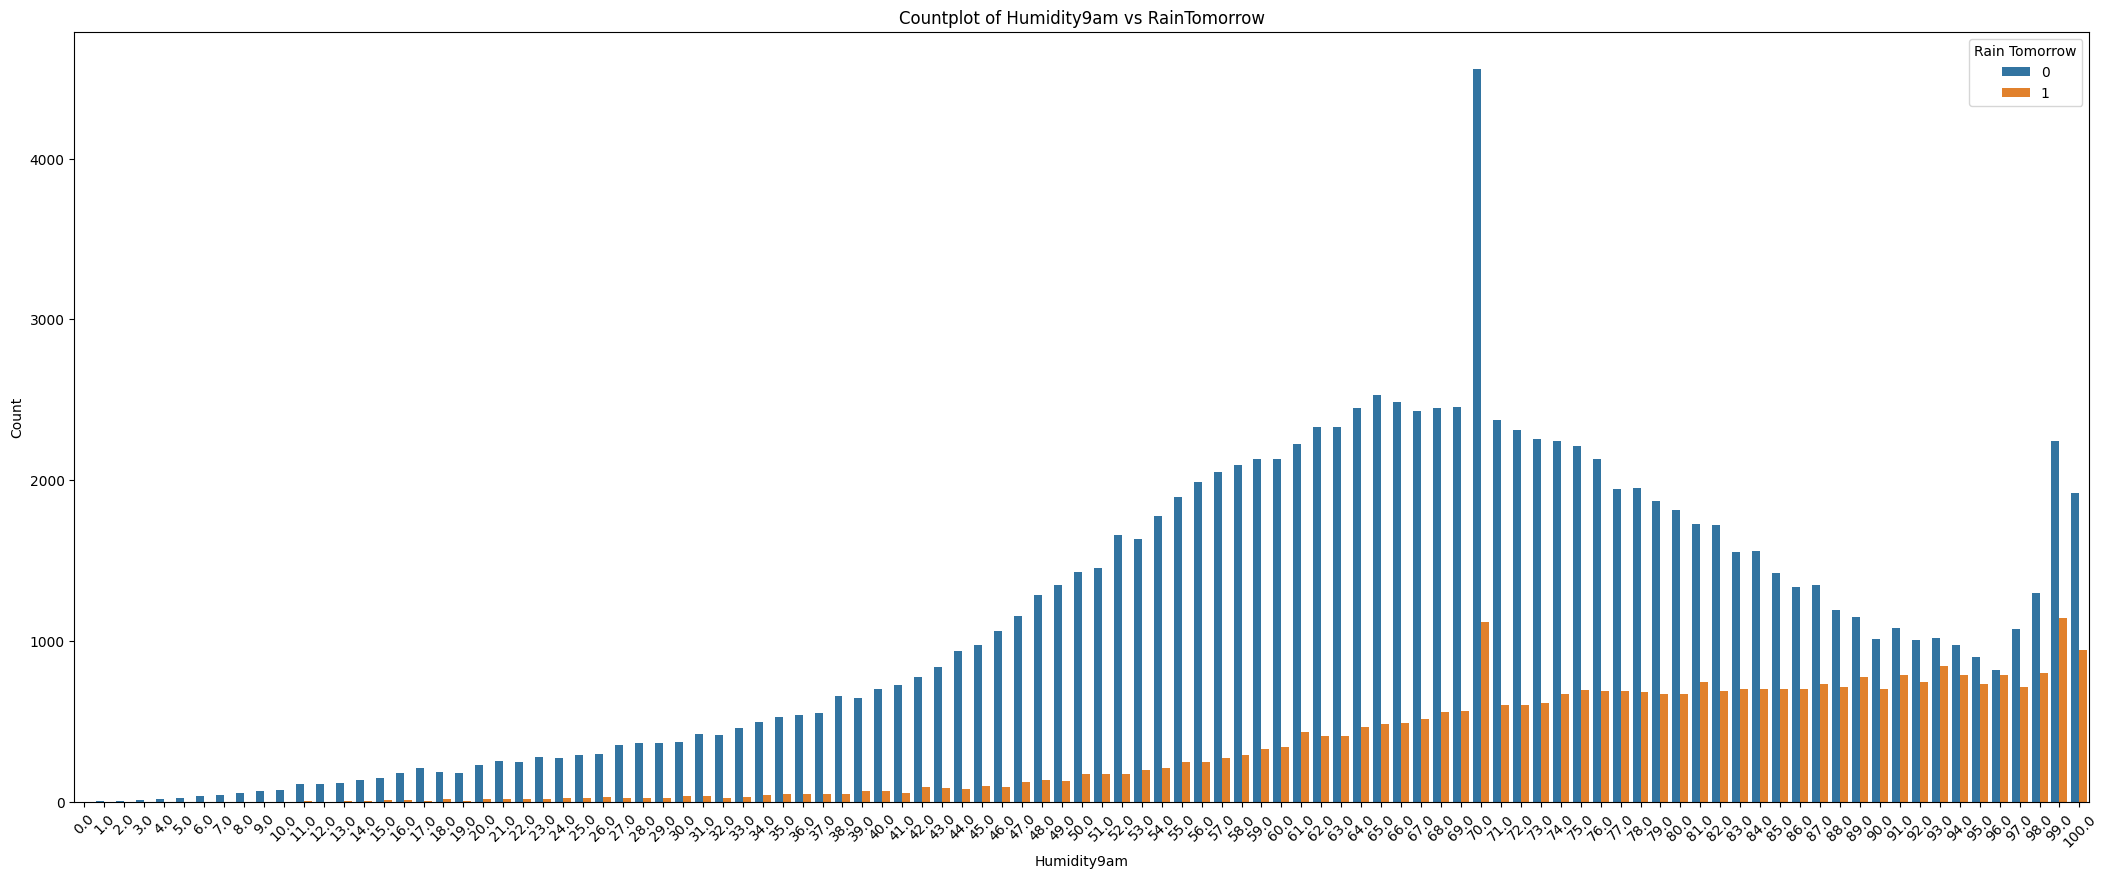

In [ ]:
# Create countplot for Humidity9am vs RainTomorrow
plt.figure(figsize=(26, 10))
sns.countplot(data=df, x='Humidity9am', hue='RainTomorrow')
plt.title('Countplot of Humidity9am vs RainTomorrow')
plt.xlabel('Humidity9am')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()

**Observations**:

1.The most frequent humidity level at 9 AM is between 40% and 60%, with a count of around 4000.

2.There are fewer occurrences of humidity levels below 20% and above 80%.

3.The distribution of humidity appears to be skewed slightly to the right, meaning there are more frequent occurrences of lower humidity levels than higher humidity levels.

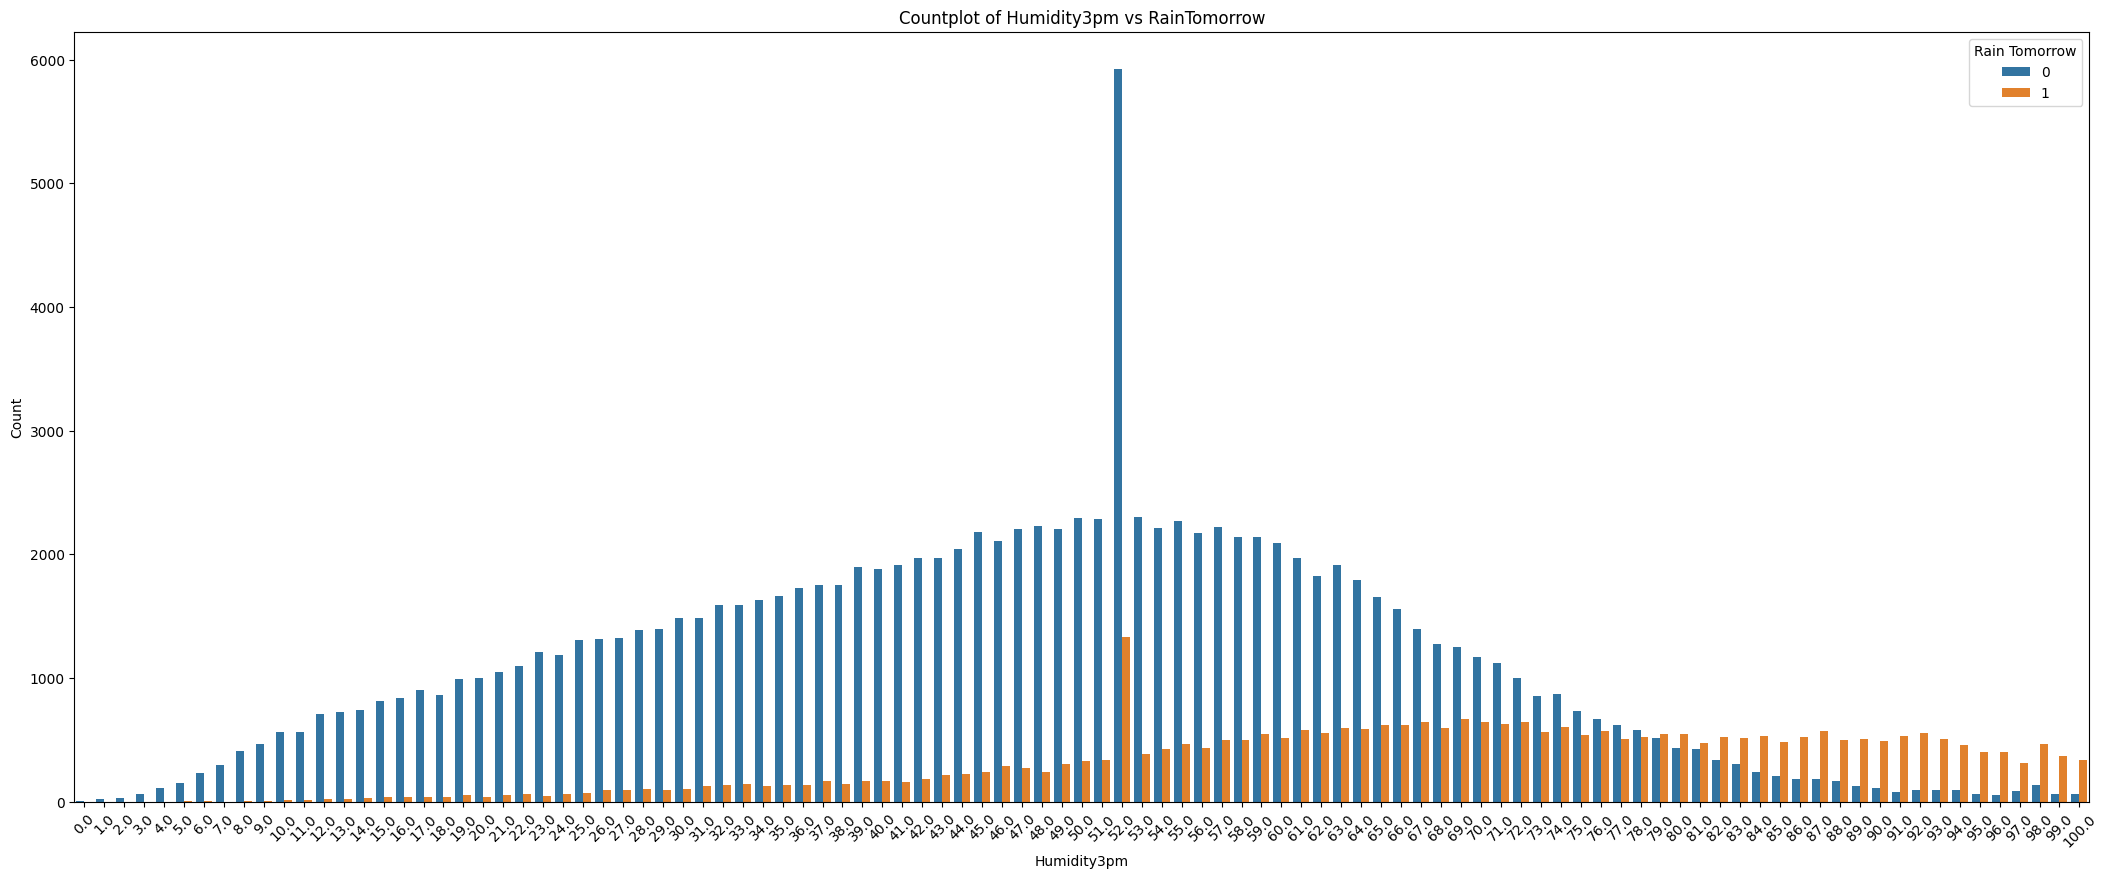

In [ ]:
# Create countplot for Humidity3pm vs RainTomorrow
plt.figure(figsize=(26, 10))
sns.countplot(data=df, x='Humidity3pm', hue='RainTomorrow')
plt.title('Countplot of Humidity3pm vs RainTomorrow')
plt.xlabel('Humidity3pm')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()

**Observations**:

1.The most frequent humidity level at 3 PM is between 20% and 40%, with a count of around 5,000.

2.There are fewer occurrences of humidity levels below 0% and above 60%.

3.The distribution of humidity appears to be skewed to the right, meaning there are more frequent occurrences of lower humidity levels than higher humidity levels.

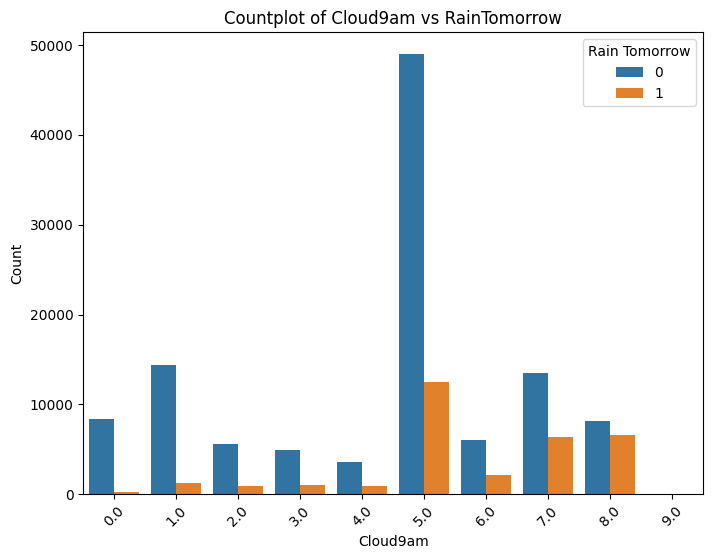

In [ ]:
# Create countplot for Cloud9am vs RainTomorrow
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cloud9am', hue='RainTomorrow')
plt.title('Countplot of Cloud9am vs RainTomorrow')
plt.xlabel('Cloud9am')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()

**Observations**:

1.The most frequent cloud cover at 9 AM is 4, which means 40% of the sky is covered by clouds. There are around 5000 counts for this cloud cover.

2.There are less frequent occurrences of cloud covers below 2 and above 7.

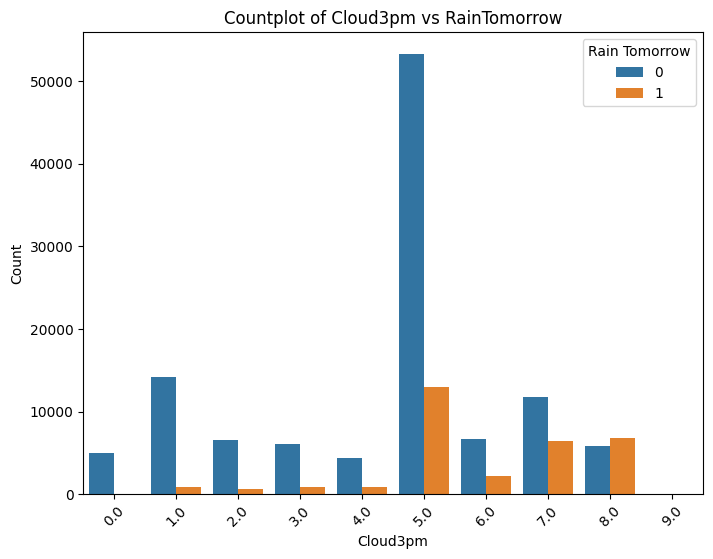

In [ ]:
# Create countplot for Cloud3pm vs RainTomorrow
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cloud3pm', hue='RainTomorrow')
plt.title('Countplot of Cloud3pm vs RainTomorrow')
plt.xlabel('Cloud3pm')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()

**Observations**:

1.The most frequent cloud cover at 3 PM on days with rain tomorrow is 5, which means the sky is almost completely overcast. There are around 2500 counts for this cloud cover.

2.There are fewer occurrences of days with rain tomorrow when the cloud cover at 3 PM is between 0 and 4 o, and between 6 and 8.

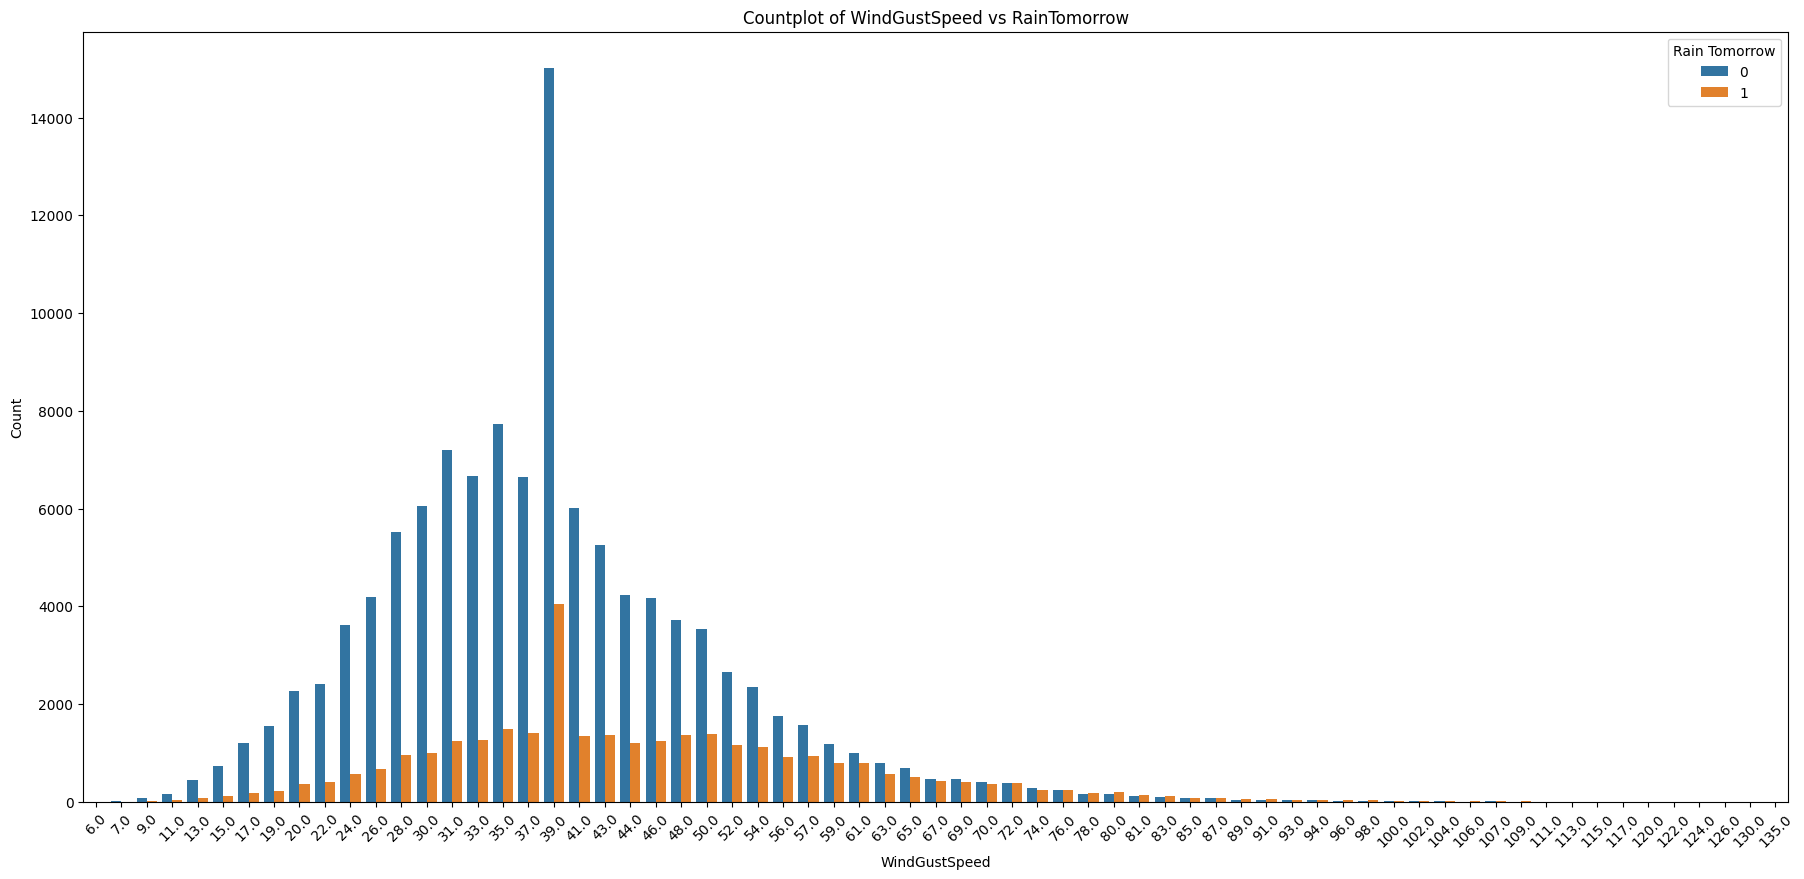

In [ ]:
# Create countplot for WindGustSpeed vs RainTomorrow
plt.figure(figsize=(22, 10))
sns.countplot(data=df, x='WindGustSpeed', hue='RainTomorrow')
plt.title('Countplot of WindGustSpeed vs RainTomorrow')
plt.xlabel('WindGustSpeed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.show()

 **Observations**:

1.The most frequent wind gust speed is between 20 and 50. There are around 12,000 counts for this wind speed.

2.There are fewer occurrences of wind speeds below 5  and above 30.

3.The wind speed appears to be skewed to the right, meaning there are more frequent occurrences of lower wind speeds than higher wind speeds.

# Distribution of each numerical column

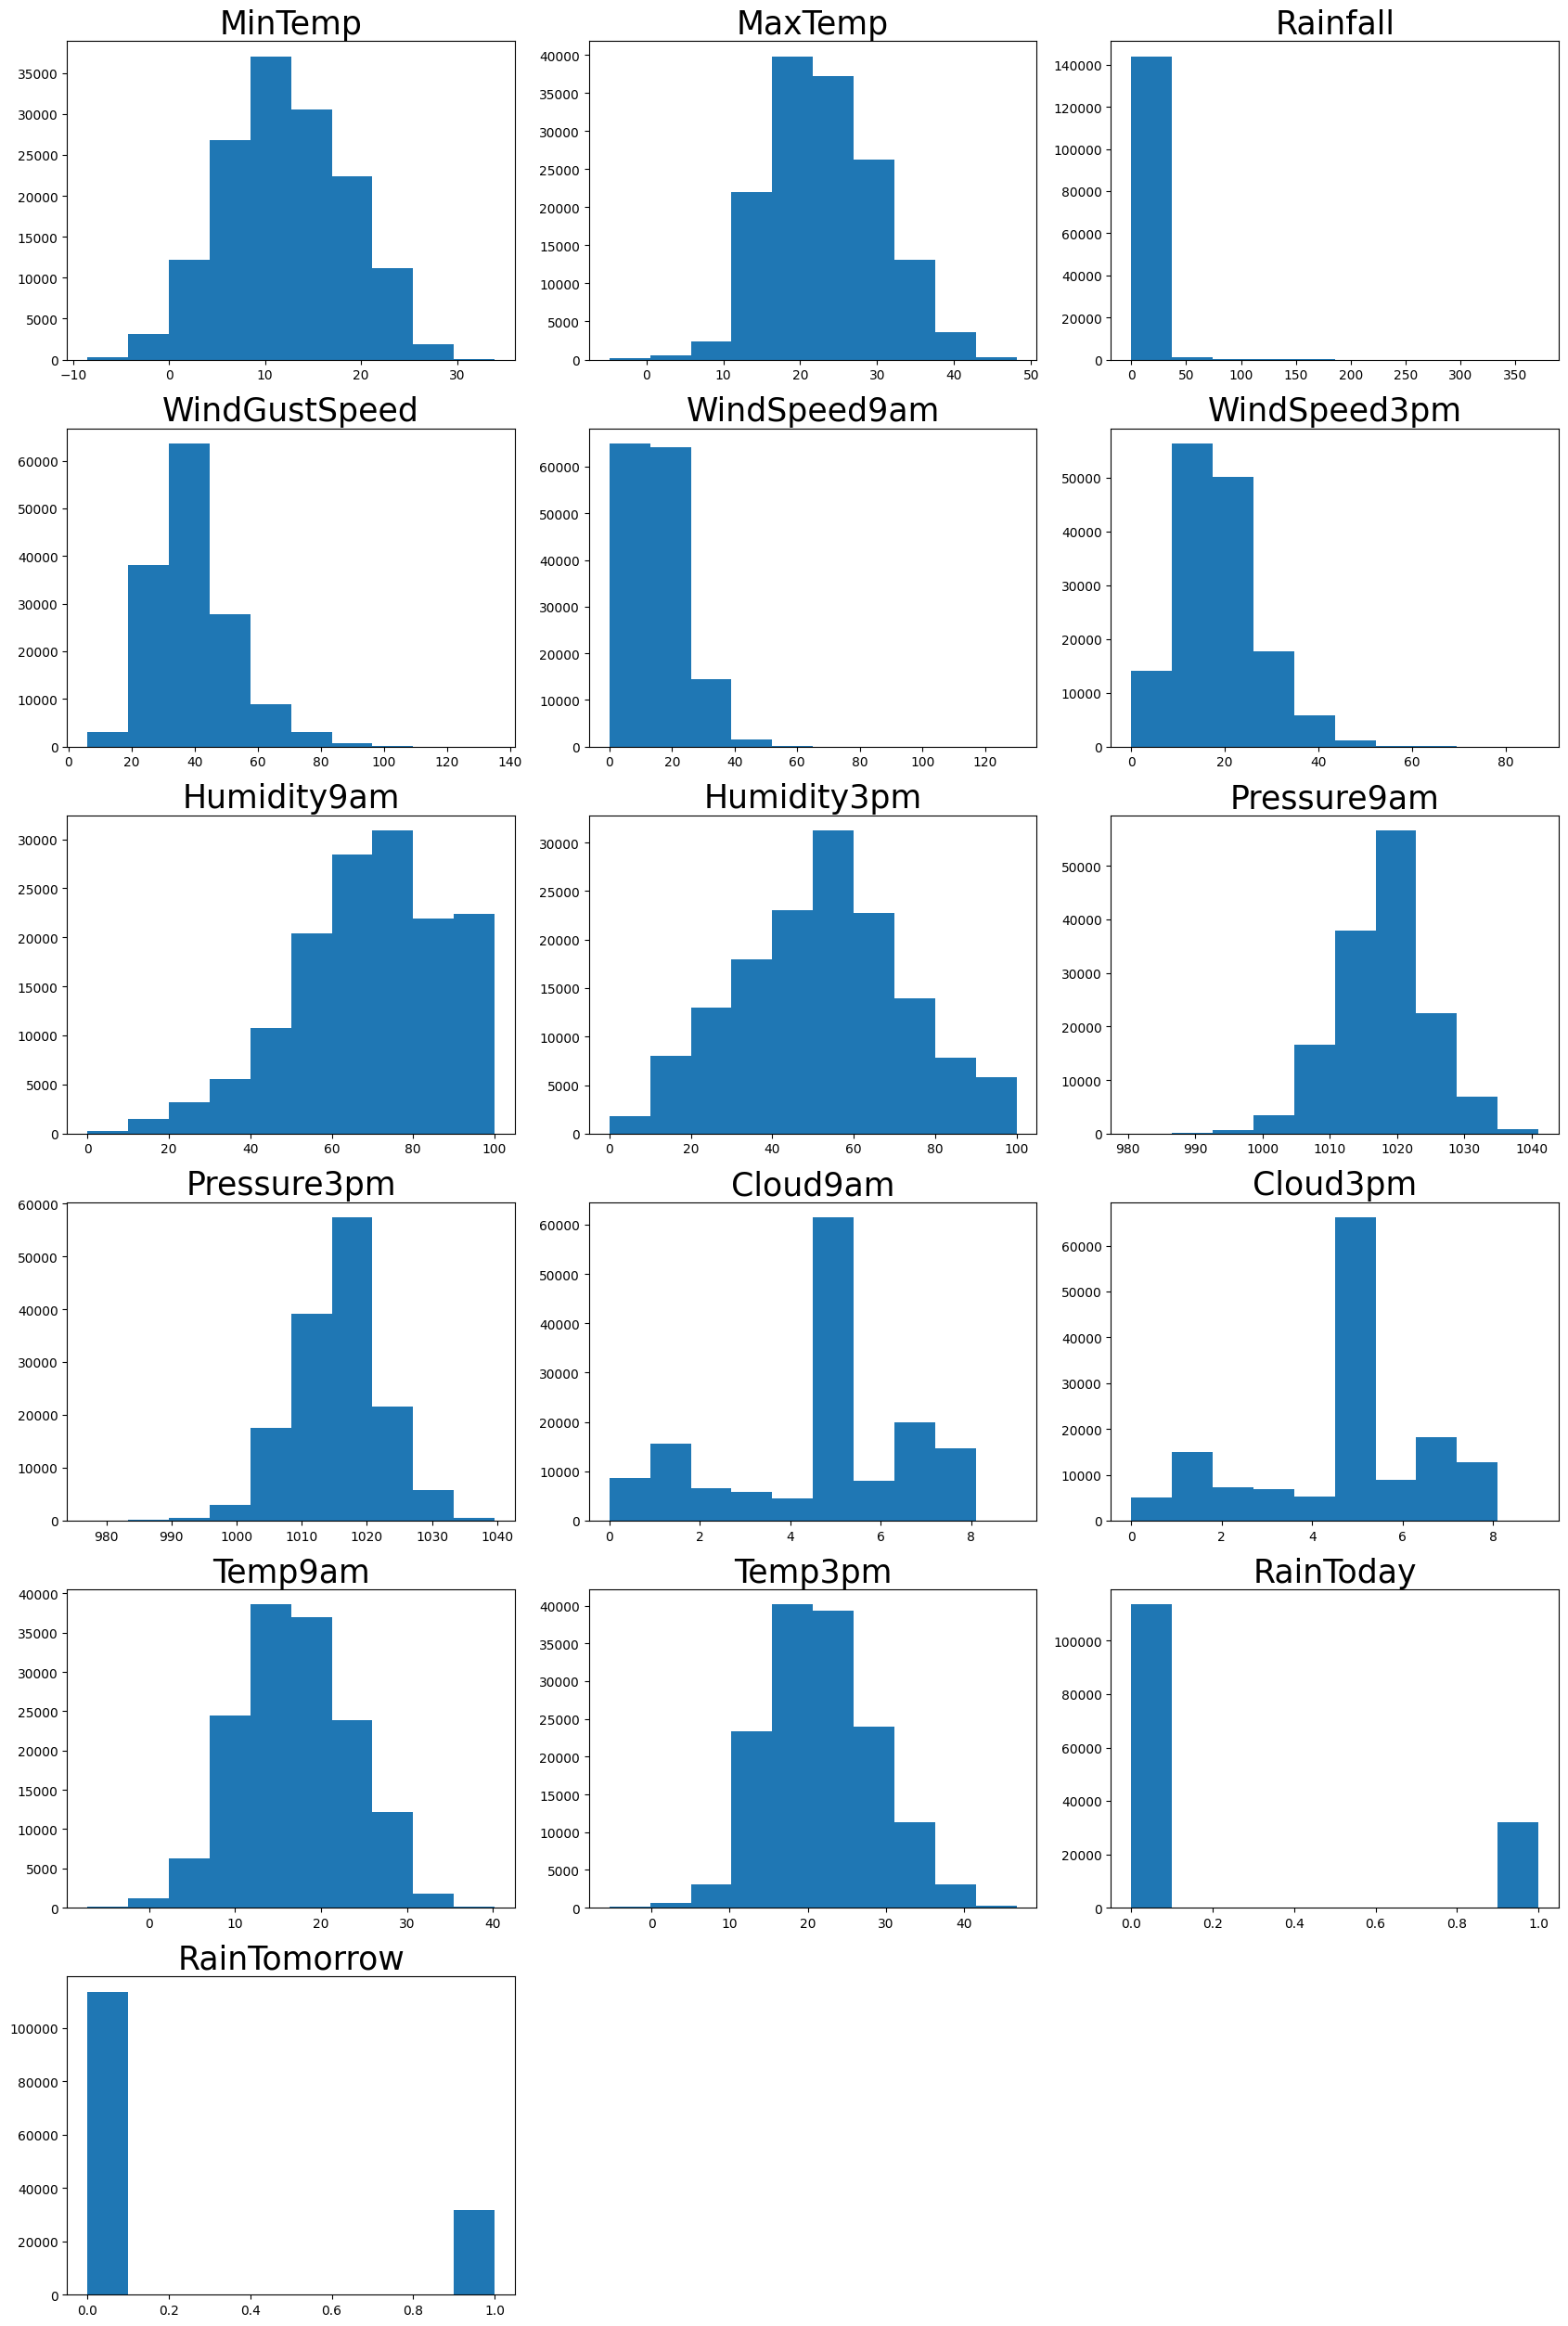

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

**Observations**:

 **MinTemp**:

1.The most frequent minimum temperature is between 10 and 20 .

2.There are fewer days with minimum temperatures below 10 degrees or above20.

3.The minimum temperature appears to be normally distributed, with a slight skew to the right.

**MaxTemp**:

1.The most frequent maximum temperature is between 60 and 70 .

2.There are fewer days with maximum temperatures below 50  or above 80.

3.The maximum temperature appears to be normally distributed.

 **WindSpeed9am and WindSpeed3pm**:

1.The most frequent wind speed at 9 AM and 3 PM is between 20 and 40.

2.There are fewer days with wind speeds below 20 miles per hour or above 60 at both 9 AM and 3 PM.

3.The wind speed appears to be normally distributed at both 9 AM and 3 PM.

 **Humidity9am**:

The most frequent humidity level at 9 AM is between 40 and 60. There are fewer occurrences of humidity levels below 20 and above 80.

 **Humidity3pm**:

The most frequent humidity level at 3 PM is between 20 and 40. There are fewer occurrences of humidity levels below 0 and above 60.

**Histograms of Pressure9am and Pressure3pm**:

1.The most frequent pressure at 9 AM and 3 PM is between 1000  and 1010 . There are fewer occurrences of pressures below 980  and above 1040 .

2.The pressure distribution appears to be similar at 9 AM and 3 PM, with both having a normal distribution with a slight skew to the right.

**Temp9am and Temp3pm**:

**Temp9am**:

The most frequent temperature is between 10 and 20 . There are fewer occurrences of temperatures below 10 and above 30. The temperature distribution appears to be slightly skewed to the right.

**Temp3pm**:
The most frequent temperature is between 20 and 30 . There are fewer occurrences of temperatures below 10 and above 40. The temperature distribution appears to be slightly skewed to the right.


**Histogram of WindGustSpeed**:

1.The most frequent wind gust speed in the United States is between 10 and 20.

2.There are fewer occurrences of wind gust speeds below 5 or above 50 .

3.The wind gust speed appears to be right-skewed, meaning that there are more frequent occurrences of lower wind gust speeds than higher wind gust speeds.

# Correlation

In [ ]:
correlation = df.corr()
correlation

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.733358,0.102339,0.171899,0.173513,0.173055,-0.231310,0.006111,-0.423299,-0.432824,0.043056,0.000157,0.897829,0.698574,0.054671,0.082249
MaxTemp,0.733358,1.000000,-0.073563,0.066451,0.014389,0.049507,-0.498350,-0.498725,-0.308057,-0.396339,-0.232311,-0.218368,0.879335,0.968332,-0.225192,-0.156523
Rainfall,0.102339,-0.073563,1.000000,0.125109,0.084586,0.055688,0.220661,0.247946,-0.158812,-0.119397,0.164202,0.139380,0.010933,-0.077466,0.502807,0.233877
WindGustSpeed,0.171899,0.066451,0.125109,1.000000,0.578744,0.657975,-0.208803,-0.026804,-0.425819,-0.384140,0.046261,0.072894,0.145717,0.032375,0.145332,0.220144
WindSpeed9am,0.173513,0.014389,0.084586,0.578744,1.000000,0.512279,-0.268196,-0.031079,-0.215107,-0.165124,0.006593,0.028376,0.127491,0.004806,0.098901,0.086746
WindSpeed3pm,0.173055,0.049507,0.055688,0.657975,0.512279,1.000000,-0.143358,0.016275,-0.277277,-0.239274,0.031498,0.010460,0.161040,0.027529,0.077084,0.084214
Humidity9am,-0.231310,-0.498350,0.220661,-0.208803,-0.268196,-0.143358,1.000000,0.659290,0.131418,0.175914,0.355815,0.278105,-0.469774,-0.491242,0.346902,0.251415
Humidity3pm,0.006111,-0.498725,0.247946,-0.026804,-0.031079,0.016275,0.659290,1.000000,-0.025986,0.048527,0.396914,0.403456,-0.216951,-0.555606,0.367919,0.433167
Pressure9am,-0.423299,-0.308057,-0.158812,-0.425819,-0.215107,-0.277277,0.131418,-0.025986,1.000000,0.959663,-0.095632,-0.107923,-0.396885,-0.265026,-0.177958,-0.230950
Pressure3pm,-0.432824,-0.396339,-0.119397,-0.384140,-0.165124,-0.239274,0.175914,0.048527,0.959663,1.000000,-0.042064,-0.060035,-0.441184,-0.360083,-0.099485,-0.211952


<Axes: >

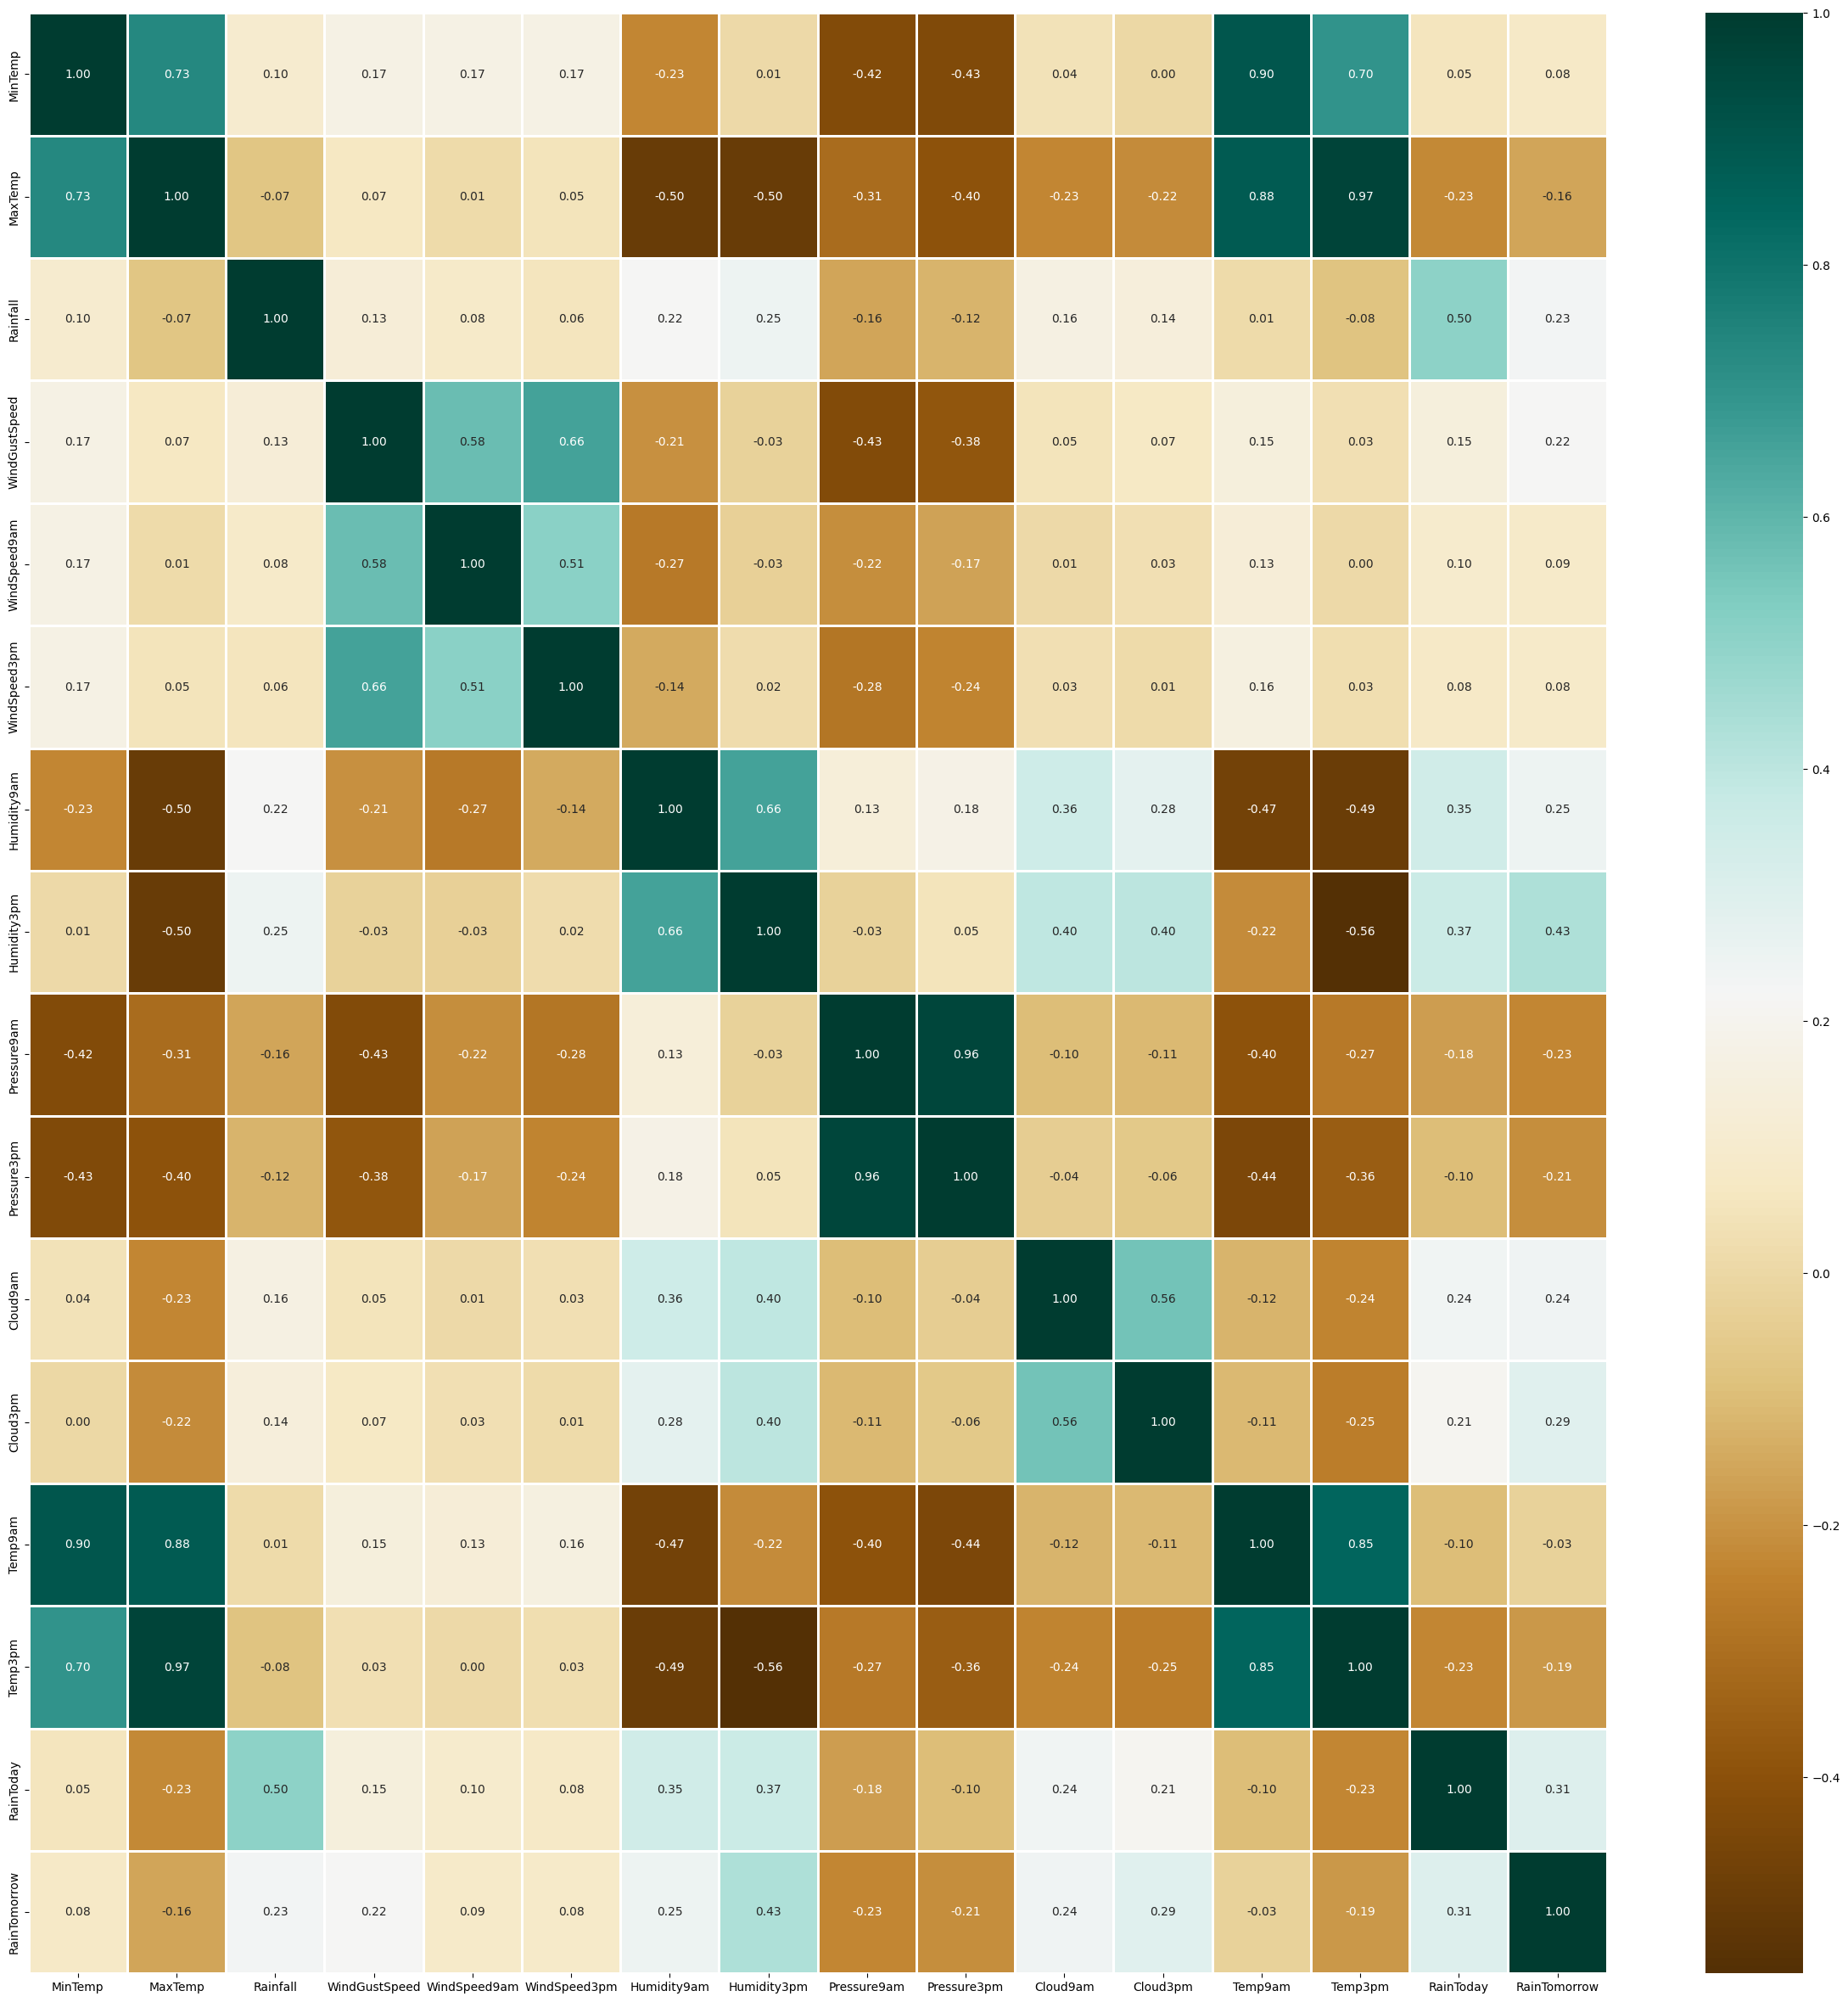

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(30,30))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

**Observations**:

**Positive correlations**:

1.There is a weak positive correlation between RainTomorrow and Cloud9am (0.20). This means that there is a slight tendency for rain tomorrow to be more likely on days with more cloud cover at 9 AM.

2.There is a weak positive correlation between RainTomorrow and Cloud3pm (0.21). This means that there is a slight tendency for rain tomorrow to be more likely on days with more cloud cover at 3 PM.

3.There is a very weak positive correlation between RainTomorrow and Temp9am (0.10). It is difficult to interpret the direction of the relationship due to the weakness of the correlation.

**Negative correlations**:

1.There is a weak negative correlation between RainTomorrow and MinTemp (-0.17). This means that there is a slight tendency for rain tomorrow to be less likely on days with lower minimum temperatures.

2.There is a very weak negative correlation between RainTomorrow and MaxTemp (-0.16). It is difficult to interpret the direction of the relationship due to the weakness of the correlation.

3.There is a weak negative correlation between RainTomorrow and Humidity9am (-0.23). This means that there is a slight tendency for rain tomorrow to be less likely on days with higher humidity levels at 9 AM.

4.There is a weak negative correlation between RainTomorrow and Humidity3pm (-0.25). This means that there is a slight tendency for rain tomorrow to be less likely on days with higher humidity levels at 3 PM.

5.There is a weak negative correlation between RainTomorrow and Pressure9am (-0.42). This means that there is a slight tendency for rain tomorrow to be less likely on days with higher pressure readings at 9 AM.

6There is a moderate negative correlation between RainTomorrow and Pressure3pm (-0.43). This means that there is a somewhat clear tendency for rain tomorrow to be less likely on days with higher pressure readings at 3 PM.

**No significant correlations**:

There appears to be no significant correlation between RainTomorrow and WindGustSpeed, WindSpeed9am, WindSpeed3pm, Temp3pm, or Rainfall. The correlation values for these variables are close to zero.

Lets look at outliers of every numerical column

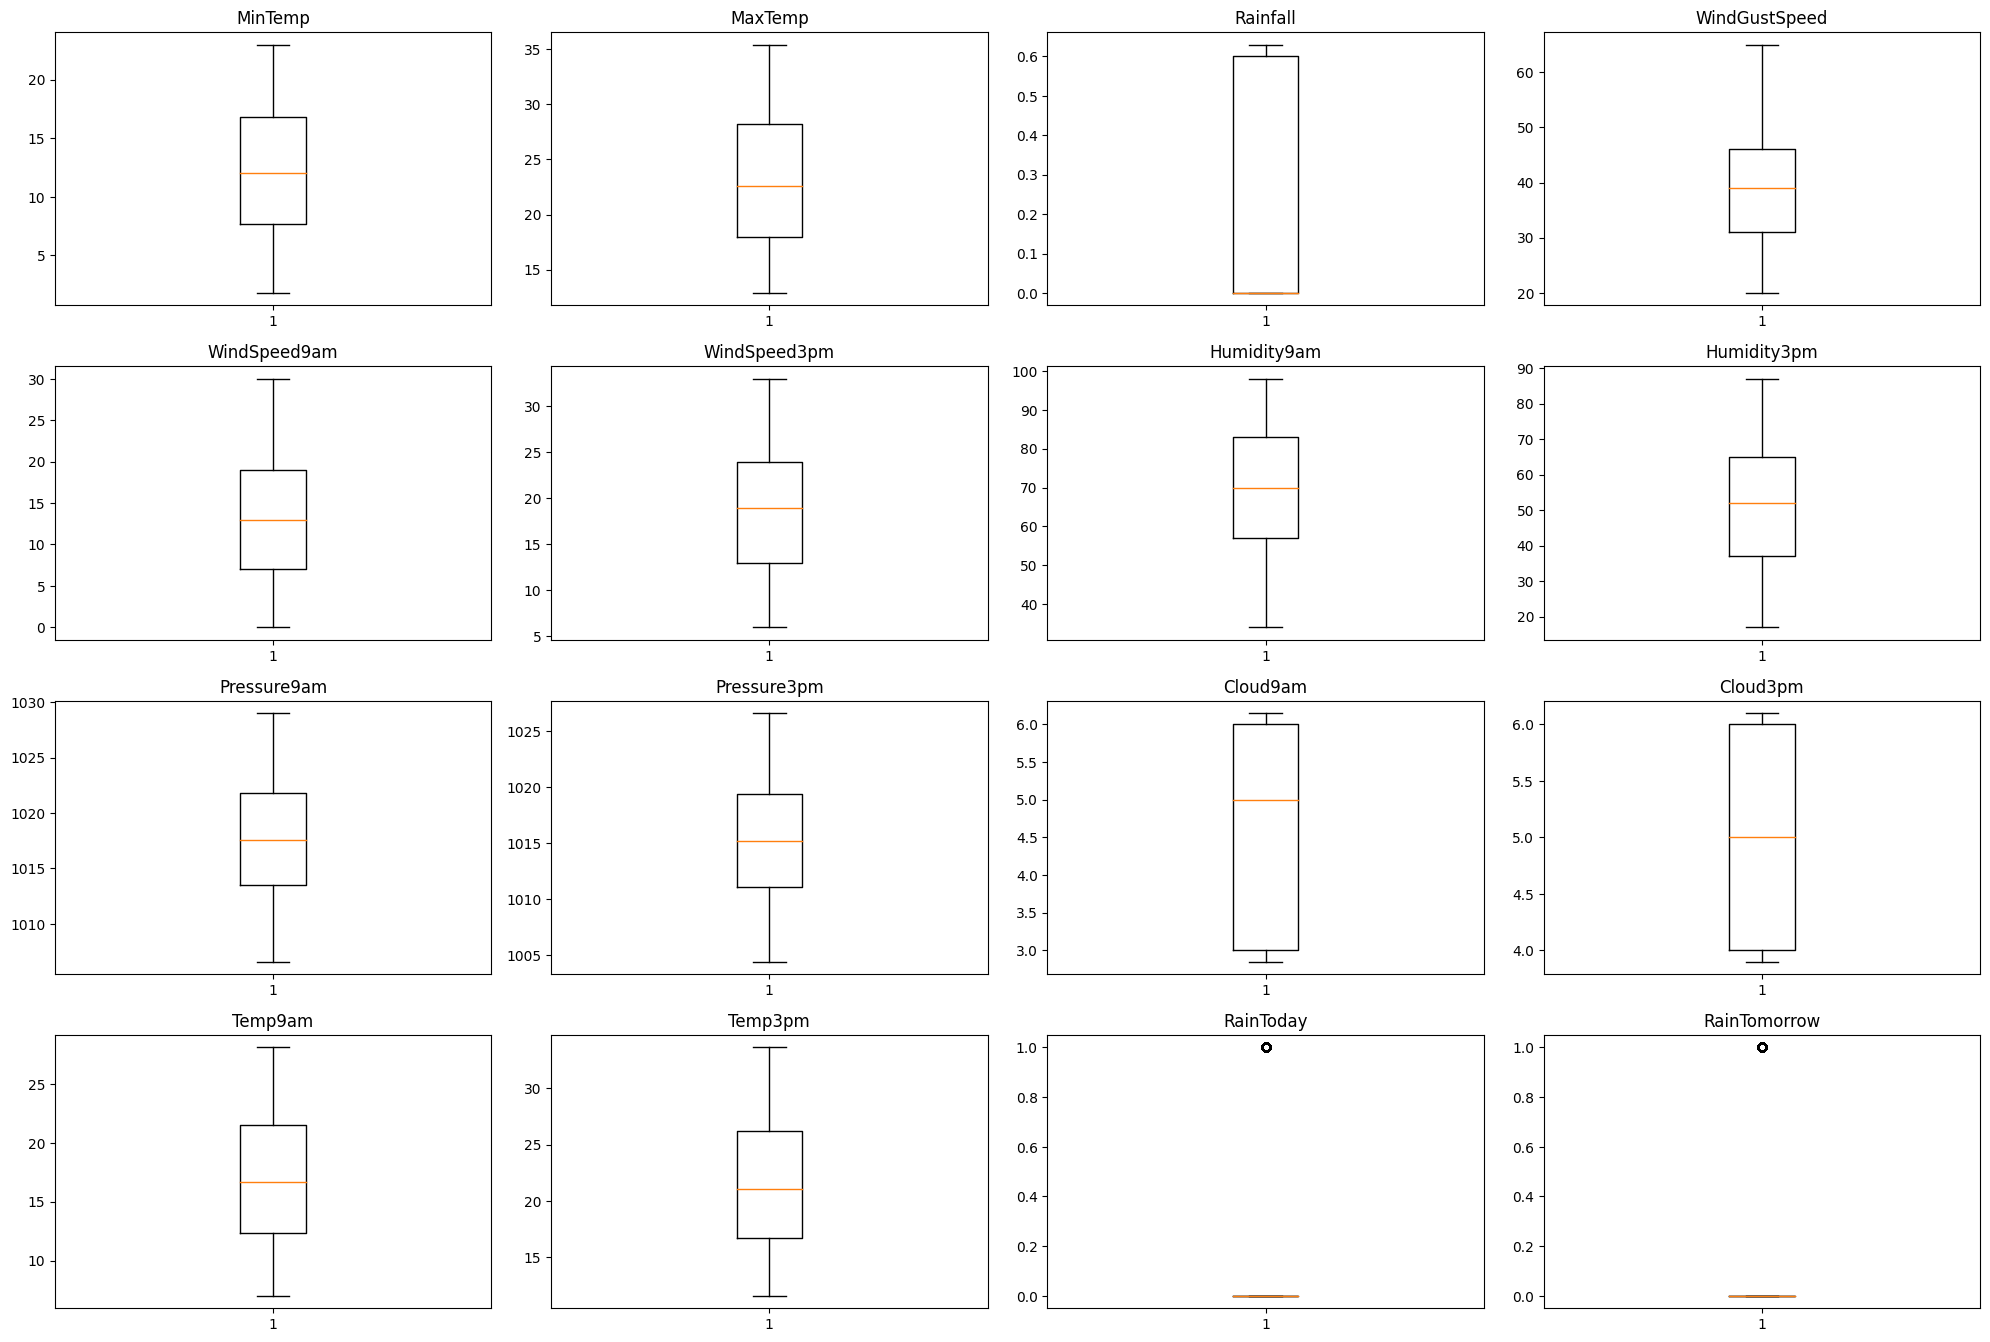

In [ ]:
#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

**Observation**:

As you can clearly see there are many outliers in MinTemp, MaxTemp, WindSpeed9am, WindSpeed3pm, Humidity9am, Rainfall, windGustSpeed, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

Few outliers in Cloud9am, Cloud3pm, RainToday and RainTomorrow.

In [ ]:
# Assuming 'df' is your DataFrame containing the columns
columns_to_trim = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                   'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow' ]

# Define the lower and upper bounds for trimming
lower_bound = 0.05  # Example lower bound (5th percentile)
upper_bound = 0.95  # Example upper bound (95th percentile)

# Apply trimming to each column
for col in columns_to_trim:
    lower_limit = df[col].quantile(lower_bound)
    upper_limit = df[col].quantile(upper_bound)
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [ ]:
outlier_cols = ['Rainfall', 'Cloud9am', 'Cloud3pm']
def winsorize(df, column, w=0.05):
    """
    Winsorizes outliers in a pandas DataFrame column.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to winsorize.
        w (float, optional): The winsorization factor (default: 0.05).

    Returns:
        pd.DataFrame: The DataFrame with the winsorized column.
    """

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - w * iqr
    upper_bound = q3 + w * iqr
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df

for col in outlier_cols:
    df = winsorize(df.copy(), col)

# Model Building

Defining the x variables and Y variable/Target Variable.

In [ ]:
x = df.drop(['RainTomorrow'], axis=1)

y = df[['RainTomorrow']]

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN

# Instantiate the SimpleImputer with a strategy to fill missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the feature matrix X
x_imputed = imputer.fit_transform(x)

# Instantiate the SMOTEENN sampler
smoteenn = SMOTEENN()

# Resample the data using SMOTEENN
x_resampled, y_resampled = smoteenn.fit_resample(x_imputed, y)

**Using SMOTEENN**: A Combination Sampling Technique to handle Class Imabalance

**SMOTEENN** stands for Synthetic Minority Over-sampling Technique (SMOTE) combined with Edited Nearest Neighbors (ENN). It is a popular technique used to address class imbalance in datasets. Here's how it works:

**SMOTE** (Synthetic Minority Over-sampling Technique):

**SMOTE** generates synthetic samples for the minority class by interpolating between existing minority class samples. This helps to increase the representation of the minority class in the dataset.
ENN (Edited Nearest Neighbors):

**ENN** is an undersampling technique that removes noisy and borderline samples from both the majority and minority classes. It focuses on removing samples that are misclassified by their nearest neighbors.
Combining SMOTE and ENN:

**SMOTEENN** combines the strengths of SMOTE and ENN by first oversampling the minority class using SMOTE to increase its representation and then using ENN to clean up the dataset by removing noisy samples from both classes.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual: ground truth
    '''
    cm = confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=["RainTomorrow_Yes", "RainTomorrow_No"],
                         columns=["RainTomorrow_Yes", "RainTomorrow_No"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f" {v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
y_train = pd.DataFrame(y_train, columns=['RainTomorrow'])

In [ ]:
y_test = pd.DataFrame(y_test, columns=['RainTomorrow'])

**Fitting the Linear Model**.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

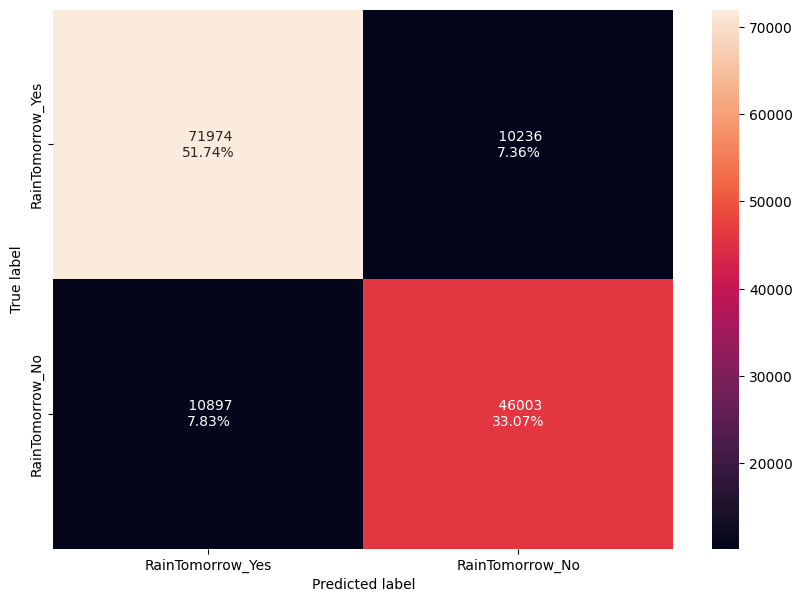

In [ ]:
pred_train = logreg.predict(x_train)
make_confusion_matrix(y_train, pred_train)

In [ ]:
pred_train = pd.DataFrame(pred_train, columns=['Predicted'])

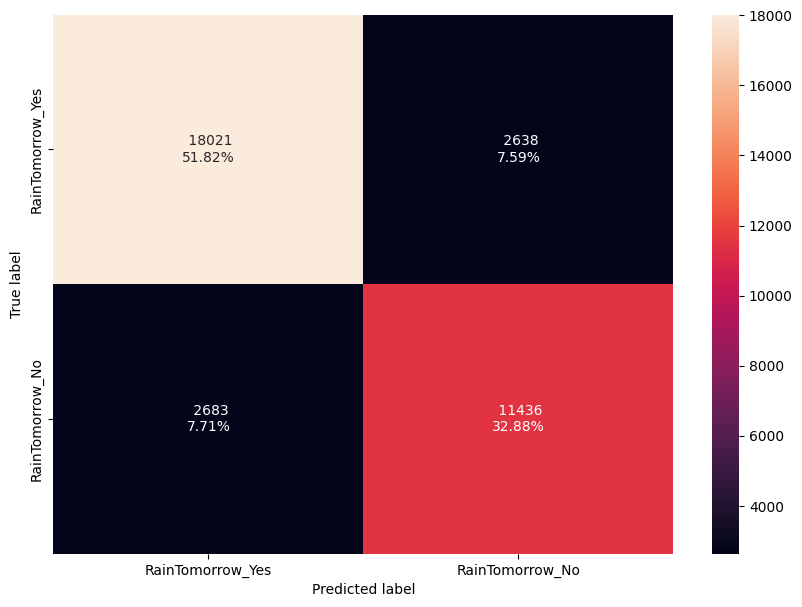

In [ ]:
pred_test = logreg.predict(x_test)
make_confusion_matrix(y_test, pred_test)

In [ ]:
pred_test = pd.DataFrame(pred_test, columns=['Predicted'])

In [ ]:
print('Accuracy on train data:', accuracy_score(y_train, pred_train) )
print('Accuracy on test data:', accuracy_score(y_test, pred_test))
print("\n")
print("Recall on train data:", recall_score(y_train, pred_train))
print("Recall on test data:", recall_score(y_test, pred_test))
print("\n")
print("Precision on train data:", precision_score(y_train, pred_train))
print("Precision on test data:", precision_score(y_test, pred_test))
print("\n")
print("f1 score on train data:", f1_score(y_train, pred_train))
print("f1 score on test data:", f1_score(y_test, pred_test))

Accuracy on train data: 0.8480842498742003
Accuracy on test data: 0.847000977629536


Recall on train data: 0.8754895998053764
Recall on test data: 0.8723074688997531


Precision on train data: 0.8685064739172932
Precision on test data: 0.870411514683153


f1 score on train data: 0.8719840563117499
f1 score on test data: 0.8713584604598312


# Plot ROC-AUC curve and see the results

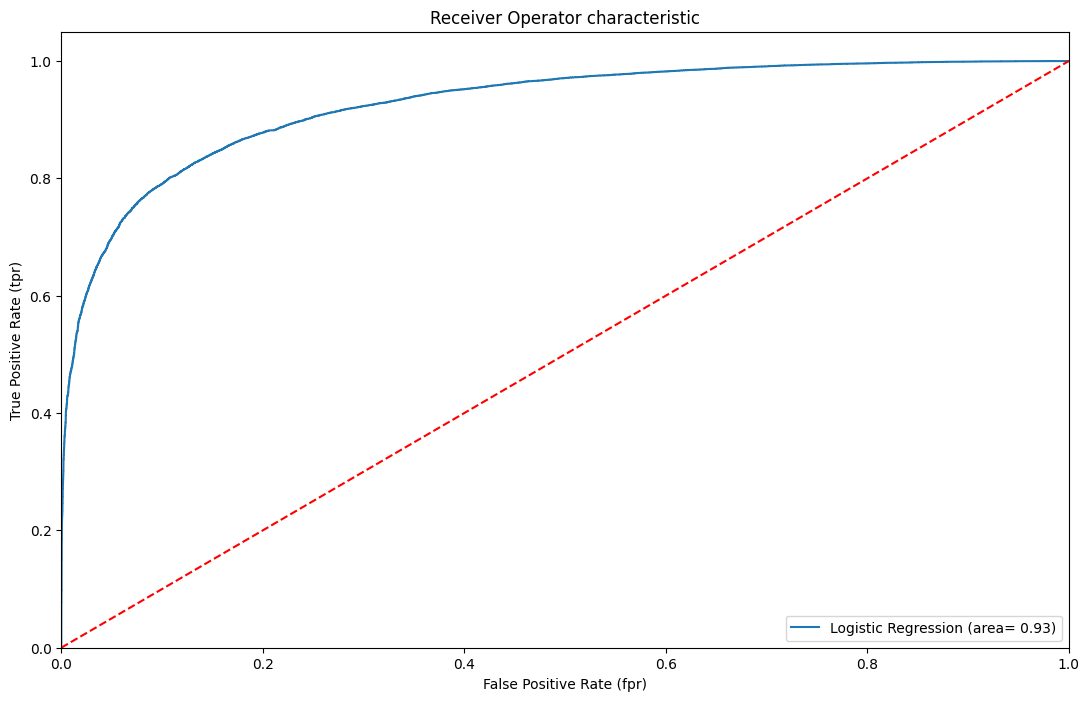

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, logreg.predict_proba(x_test) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Optimal Cutoff

In [ ]:
train_pred_prob = logreg.predict_proba(x_train)[:,1]
train_pred_prob

array([0.85723682, 0.77461016, 0.99367402, ..., 0.97833659, 0.92096561,
       0.95825644])

In [ ]:
# Define column names for the DataFrame
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

# Create an empty DataFrame with the specified column names
cutoff_data = pd.DataFrame(columns=column_names)

# Generate a range of cutoff probabilities from 0 to 1 with a step size of 0.01
Cutoff_Prob = np.arange(0, 1.01, 0.01)

# Iterate over each cutoff probability
for cutoff in Cutoff_Prob:
    # Predict binary labels based on the probability cutoff
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")

    # Calculate True Positives (TP), False Negatives (FN), True Negatives (TN), False Positives (FP)
    TP = np.logical_and((y_train.pred_y == 1), (y_train.RainTomorrow == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.RainTomorrow == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.RainTomorrow == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.RainTomorrow == 0)).sum()

    # Calculate total Positive (P) and Negative (N) instances
    P = TP + FN
    N = TN + FP

    # Create a dictionary with the calculated values
    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    # Append the dictionary as a new row to the cutoff_data DataFrame
    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data to avoid conflicts
y_train.drop("pred_y", axis=1, inplace=True)

We have got the basic cutoff data. Let us now get all the features needed to decide the cutoff.

In [ ]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [ ]:
cutoff_data.head()

,Cutoff_Prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.00,82210.0,0.0,0.0,56900.0,82210.0,56900.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.590971,1.000000,1.000000,0.742906
1,0.01,82186.0,24.0,2311.0,54589.0,82210.0,56900.0,0.999708,0.040615,0.959385,0.040323,0.999708,0.600885,0.999708,0.959385,0.750608
2,0.02,82102.0,108.0,5705.0,51195.0,82210.0,56900.0,0.998686,0.100264,0.899737,0.098950,0.998686,0.615933,0.998686,0.899736,0.761943
3,0.03,82002.0,208.0,8506.0,48394.0,82210.0,56900.0,0.997470,0.149490,0.850513,0.146960,0.997470,0.628869,0.997470,0.850510,0.771399
4,0.04,81918.0,292.0,10933.0,45967.0,82210.0,56900.0,0.996448,0.192144,0.807864,0.188592,0.996448,0.640560,0.996448,0.807856,0.779819


# Let us now check for the results for accuracy using different cutoff methods.

Let us pick up max distance first

We will be calculating the following cutoffs :-

1.**dist_cutoff**: Finds the cutoff probability value based on the minimum distance calculated in the cutoff_data DataFrame. It selects the row with the smallest distance and retrieves the corresponding cutoff probability value.

2.**ks_cutoff**: Determines the cutoff probability value based on the maximum Kolmogorov-Smirnov (KS) statistic calculated in the cutoff_data DataFrame. It selects the row with the largest KS statistic and retrieves the corresponding cutoff probability value.

3.**f1_cutoff**: Calculates the cutoff probability value based on the maximum F1 score calculated in the cutoff_data DataFrame. It selects the row with the highest F1 score and retrieves the corresponding cutoff probability value.

In [ ]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

In [ ]:
print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.5700000000000001
The KS cutoff determined is: 0.62
The f1 cutoff determined is: 0.48


In [ ]:
# List of cutoff values
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (logreg.predict_proba(x_train)[:,1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(x_test)[:,1] > cutoff).astype(int)

    # Print results using the current cutoff value
    print("Using the cutoff value as:", cutoff)
    print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
    print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
    print("Recall on train data:", recall_score(y_train, y_pred_train))
    print("Recall on test data:", recall_score(y_test, y_pred_test))
    print("Precision on train data:", precision_score(y_train, y_pred_train))
    print("Precision on test data:", precision_score(y_test, y_pred_test))
    print("f1 score on train data:", f1_score(y_train, y_pred_train))
    print("f1 score on test data:", f1_score(y_test, y_pred_test))
    print("\n")

Using the cutoff value as: 0.5700000000000001
Accuracy on train data: 0.8465674645963626
Accuracy on test data: 0.8453907642762666
Recall on train data: 0.8459554798686291
Recall on test data: 0.8424899559514013
Precision on train data: 0.8890394497992995
Precision on test data: 0.8912843097091356
f1 score on train data: 0.8669625271136154
f1 score on test data: 0.8662005126035781


Using the cutoff value as: 0.62
Accuracy on train data: 0.8427934727913162
Accuracy on test data: 0.8413077232733337
Recall on train data: 0.8226249847950371
Recall on test data: 0.8184326443680721
Precision on train data: 0.9027297603951144
Precision on test data: 0.9053330477618333
f1 score on train data: 0.8608178202068416
f1 score on test data: 0.8596923859158511


Using the cutoff value as: 0.48
Accuracy on train data: 0.8473510171806484
Accuracy on test data: 0.8463396400023003
Recall on train data: 0.8831407371366014
Recall on test data: 0.8800522774577666
Precision on train data: 0.8619510631477721


In [ ]:
default=0.5 # default cutoff

In [ ]:
# Define the cutoff values
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]

# Initialize an empty list to store results
results = []

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (logreg.predict_proba(x_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(x_test)[:, 1] > cutoff).astype(int)

    # Calculate evaluation metrics for train and test data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Store the results in a dictionary
    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_train,
        'Accuracy_test': accuracy_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test,
        'Precision_train': precision_train,
        'Precision_test': precision_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
    }

    # Append the dictionary to the results list
    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,0.50,0.848084,0.847001,0.875490,0.872307,0.868506,0.870412,0.871984,0.871358
1,0.57,0.846567,0.845391,0.845955,0.842490,0.889039,0.891284,0.866963,0.866201
2,0.62,0.842793,0.841308,0.822625,0.818433,0.902730,0.905333,0.860818,0.859692
3,0.48,0.847351,0.846340,0.883141,0.880052,0.861951,0.863829,0.872417,0.871865


# Decision tree classifier
**Decision Tree Classifier**: Makes decisions by splitting the data based on features, easy to interpret but prone to overfitting.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Metrics:
Accuracy: 0.9103456207947553
Precision: 0.9219223553182277
Recall: 0.9276344450360617
F1 Score: 0.9247695796940597


**To deal with Overfitting, we will use Decision Tree Pre-Pruning and we will use RandomizedSearchCV over GridSearch CV to reduce processing time**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their ranges for tuning
parameters = {
    "max_depth": np.arange(1, 10),  # Maximum depth of the tree
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "splitter": ["best", "random"],  # Strategy to choose the split at each node
    "min_samples_split": np.arange(2, 20),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    "max_features": ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(dt_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_dt_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_dt_classifier.predict(x_train)
y_test_pred = best_dt_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'entropy'}
Training Metrics:
Accuracy: 0.8789303428941125
Precision: 0.9100055195945607
Recall: 0.8823987349470868
F1 Score: 0.8959895260798142

Test Metrics:
Accuracy: 0.8753522341710277
Precision: 0.9081
Recall: 0.8791325814415025
F1 Score: 0.8933815391426253


# Random Forest Classifier
**Random Forest Classifier**: Ensemble of decision trees that combines their predictions for improved accuracy and reduced overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 7, 15],  # Number of trees in the forest
    'max_depth': np.arange(1, 10),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_rf_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_rf_classifier.predict(x_train)
y_test_pred = best_rf_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 9}
Training Metrics:
Accuracy: 0.9097404931349292
Precision: 0.9354899214725154
Recall: 0.9100231115436078
F1 Score: 0.9225808042816097

Test Metrics:
Accuracy: 0.9034447064236011
Precision: 0.9306945481702763
Recall: 0.9048356648434096
F1 Score: 0.9175829569998036


# Bagging Classifier
**Bagging Classifier (Bootstrap Aggregating)**: Builds multiple models on bootstrapped samples of the data, averaging their predictions to reduce variance.

In [ ]:
from sklearn.ensemble import BaggingClassifier
# Initialize base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=1)

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_samples': [0.5, 1.0],  # Maximum number of samples to draw from X to train each base estimator
    'max_features': [0.5, 1.0]  # Maximum number of features to consider when looking for the best split
}


# Initialize Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(bagging_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_bagging_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_bagging_classifier.predict(x_train)
y_test_pred = best_bagging_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 10, 'max_samples': 1.0, 'max_features': 1.0}
Training Metrics:
Accuracy: 0.9960534828552944
Precision: 0.9988393544367203
Recall: 0.9944775574747597
F1 Score: 0.9966536836908222

Test Metrics:
Accuracy: 0.9391856921042038
Precision: 0.9608808032607615
Recall: 0.9357180889684883
F1 Score: 0.9481325256885009


# AdaBoostClassifier
**AdaBoost Classifier (Adaptive Boosting)**: Sequentially trains weak learners, assigning higher weights to misclassified instances to improve performance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier with hyperparameter tuning parameters
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameter_grid = {
    'n_estimators': np.arange(10, 50, 5),  # Number of boosting stages to be used in the boosting process
    'learning_rate': [1, 0.1, 0.5, 0.01]  # Weight applied to each classifier at each boosting iteration
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(ab_tuned, parameter_grid, scoring='recall', cv=5, n_iter=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_ab_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_ab_tuned.predict(x_train)
y_test_pred = best_ab_tuned.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 15, 'learning_rate': 0.5}
Training Metrics:
Accuracy: 0.8633383653224067
Precision: 0.8854302616332256
Recall: 0.8830069334630823
F1 Score: 0.8842169371783549

Test Metrics:
Accuracy: 0.8619817125769165
Precision: 0.8867105584003901
Recall: 0.8801006825112542
F1 Score: 0.8833932562433194


# GradientBoostingClassifier
**Gradient Boosting Classifier**: Builds decision trees sequentially, correcting errors made by previous trees to minimize a loss function.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier with hyperparameter tuning parameters
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from

parameter_grid = {
    'n_estimators': [20, 30, 40],  # Number of boosting stages to be used in the boosting process
    'learning_rate': [0.1, 0.3, 0.5],  # Weight applied to each classifier at each boosting iteration
    'max_depth': [3, 4, 5],  # Maximum depth of each tree in the ensemble
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(gb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best estimator
best_gb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_gb_tuned.predict(x_train)
y_test_pred = best_gb_tuned.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')  # Changed to 'weighted'
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Changed to 'weighted'
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 40, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.3}
Training Metrics:
Accuracy: 0.9416936237509884
Precision: 0.942353318130341
Recall: 0.9388152292908405
F1 Score: 0.9500772445544128

Test Metrics:
Accuracy: 0.9358502501581459
Precision: 0.9364849335495041
Recall: 0.934943608112687
F1 Score: 0.9454002594160692


# XGBClassifier
**XGBoost Classifier (Extreme Gradient Boosting)**: Optimized implementation of gradient boosting with enhancements for improved speed and performance.

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier with hyperparameter tuning parameters
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from (with reduced values for faster execution)
parameter_grid = {
    'n_estimators': [50, 75, 100],  # Number of trees in the ensemble
    'subsample': [0.7, 0.8, 0.09],  # Subsample ratio of the training instances
    'gamma': [0, 1, 3],  # Minimum loss reduction required to make a further partition on a leaf node
    'colsample_bytree': [0.7, 0.8, 0.09],  # Subsample ratio of columns when constructing each tree
    'colsample_bylevel': [0.7, 0.8, 0.09]  # Subsample ratio of columns for each level when constructing each tree
}


# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(xgb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best estimator
best_xgb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_xgb_tuned.predict(x_train)
y_test_pred = best_xgb_tuned.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')  # Changed to 'weighted'
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Changed to 'weighted'
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}
Training Metrics:
Accuracy: 0.9576306520020128
Precision: 0.9584209321965134
Recall: 0.9499695900742002
F1 Score: 0.9636370366714377

Test Metrics:
Accuracy: 0.9466616826729541
Precision: 0.9474652408449467
Recall: 0.941575100440486
F1 Score: 0.9544885792094997


# Feature Importance

In [ ]:
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.60,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,6.15,5.0,16.9,21.8,0.0,0.0
1,7.4,25.1,0.00,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.00,5.0,17.2,24.3,0.0,0.0
2,12.9,25.7,0.00,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.00,3.9,21.0,23.2,0.0,0.0
3,9.2,28.0,0.00,24.0,11.0,9.0,45.0,17.0,1017.6,1012.8,5.00,5.0,18.1,26.5,0.0,0.0
4,17.5,32.3,0.63,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,6.15,6.1,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.00,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,5.00,5.0,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.00,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,5.00,5.0,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.00,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,5.00,5.0,12.5,26.1,0.0,0.0
145458,7.8,27.0,0.00,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.00,3.9,15.1,26.0,0.0,0.0


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x, y)

feature_importances = model.feature_importances_
feature_names = x.columns

# Create and sort the DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most significant features
print("Most significant features:")
print(importance_df)

Most significant features:
          Feature  Importance
7     Humidity3pm    0.370177
2        Rainfall    0.115346
3   WindGustSpeed    0.091509
14      RainToday    0.078701
11       Cloud3pm    0.075637
9     Pressure3pm    0.060458
6     Humidity9am    0.026507
5    WindSpeed3pm    0.025594
13        Temp3pm    0.025154
10       Cloud9am    0.023666
0         MinTemp    0.023271
1         MaxTemp    0.022905
12        Temp9am    0.021628
8     Pressure9am    0.019858
4    WindSpeed9am    0.019589


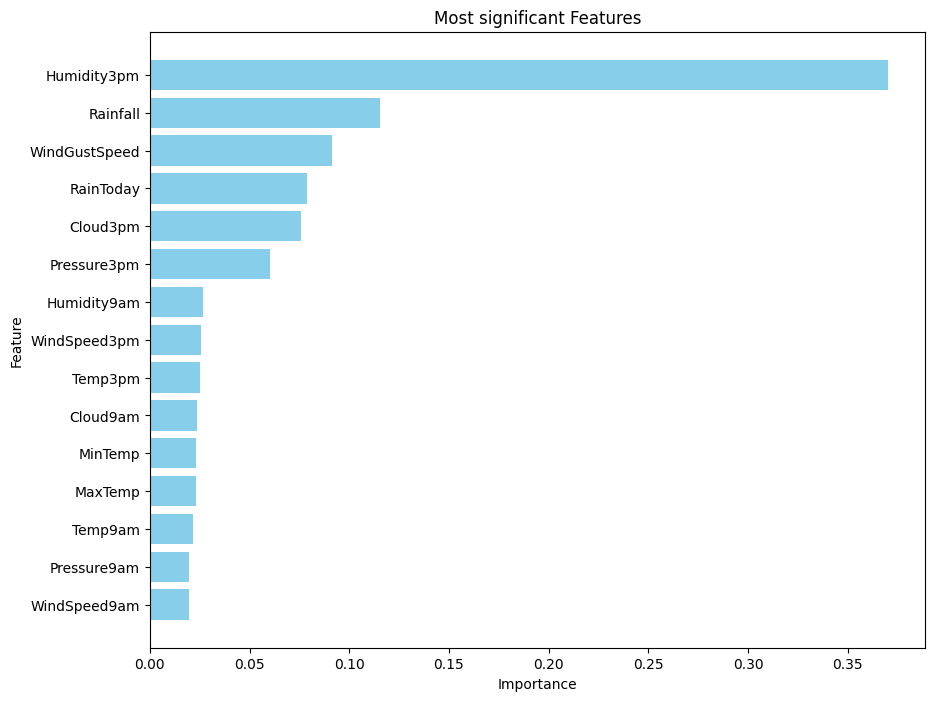

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Most significant Features')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Summary

In [ ]:
# Define the performance metrics
performance_metrics = {
    "Classifier": ["Logistic Regression", "Decision Tree Classifier",
                  "Decision Tree Classifier with Pre-Pruning", "Random Forest Classifier",
                  "Bagging Classifier", "Adaboost Classifier",
                  "Gradient Boost Classifier", "XG Boost Classifier"],
    "Train Accuracy": [0.8473, 1.0, 0.8789, 0.9097, 0.9960, 0.8633, 0.9416, 0.9576],
    "Test Accuracy": [0.8463, 0.9103, 0.8753, 0.9034, 0.9391, 0.8619, 0.9358, 0.9466],
    "Train Recall": [0.8831, 1.0, 0.8823, 0.9100, 0.9944, 0.8830, 0.9388, 0.9499],
    "Test Recall": [0.8800, 0.9276, 0.8791, 0.9048, 0.9357, 0.8801, 0.9349, 0.9415],
    "Train Precision": [0.8619, 1.0, 0.9100, 0.9354, 0.9988, 0.8854, 0.9423, 0.9584],
    "Test Precision": [0.8638, 0.9219, 0.9081, 0.9306, 0.9608, 0.8867, 0.9364, 0.9474],
    "Train F1 Score": [0.8724, 1.0, 0.8959, 0.9225, 0.9966, 0.8842, 0.9500, 0.9636],
    "Test F1 Score": [0.8718, 0.9247, 0.8933, 0.9175, 0.9481, 0.8833, 0.9454, 0.9544]
}

# Create DataFrame
df_summary= pd.DataFrame(performance_metrics)

# Set Classifier column as index
df_summary.set_index("Classifier", inplace=True)

# Display the DataFrame
df_summary

,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1 Score,Test F1 Score
Classifier,,,,,,,,
Logistic Regression,0.8473,0.8463,0.8831,0.8800,0.8619,0.8638,0.8724,0.8718
Decision Tree Classifier,1.0000,0.9103,1.0000,0.9276,1.0000,0.9219,1.0000,0.9247
Decision Tree Classifier with Pre-Pruning,0.8789,0.8753,0.8823,0.8791,0.9100,0.9081,0.8959,0.8933
Random Forest Classifier,0.9097,0.9034,0.9100,0.9048,0.9354,0.9306,0.9225,0.9175
Bagging Classifier,0.9960,0.9391,0.9944,0.9357,0.9988,0.9608,0.9966,0.9481
Adaboost Classifier,0.8633,0.8619,0.8830,0.8801,0.8854,0.8867,0.8842,0.8833
Gradient Boost Classifier,0.9416,0.9358,0.9388,0.9349,0.9423,0.9364,0.9500,0.9454
XG Boost Classifier,0.9576,0.9466,0.9499,0.9415,0.9584,0.9474,0.9636,0.9544


**Observations**:

**Performance**:

1.Highest average accuracy: XGBoost achieved the highest average accuracy (around 95%) across all eight data points compared to other models.

2.Consistent performance: While some data points show lower accuracy than others, XGBoost generally displays more variability compared to some models like Decision Tree Classifiers, which might indicate better generalization capabilities.

3.Therefore, XGBoost is recommended as the algorithm of choice for the given task.

# Conclusion

**Observations**:

1.**Humidity3pm**: This feature (humidity measured at 3 PM) has the highest importance in predicting rainfall, with a score of 0.37.

2.**Rainfall**: The current rainfall holds the second-highest importance (0.12), indicating that the model heavily relies on the existing precipitation as a predictor.

3.**WindGustSpeed**: Wind gust speed comes in third, suggesting its influence on rainfall prediction.

4.**RainToday**: Interestingly, the model also considers the previous day's rainfall (0.08) as a significant factor.

5.**Cloud3pm and Pressure3pm**: These features representing afternoon cloud cover and atmospheric pressure also hold moderate importance.

While the XGBoost model identifies significant features related to atmospheric conditions (humidity, wind, pressure, cloud cover) and historical rainfall, drawing a definitive conclusion about its overall effectiveness for rainfall prediction.